In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from typing import List, Optional, Tuple


In [2]:
from starccato_flow.data.toy_data import ToyData
from starccato_flow.data.ccsn_data import CCSNData
from starccato_flow.training.trainer import Trainer

from starccato_flow.plotting.plotting import plot_reconstruction_distribution

/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from starccato_flow.utils.defaults import DEVICE

### Dataset

In [4]:
# train_dataset = ToyData(num_signals=1684, signal_length=256)
# validation_dataset = ToyData(num_signals=round(1684 * 0.1), signal_length=256)

### Dataset Plots

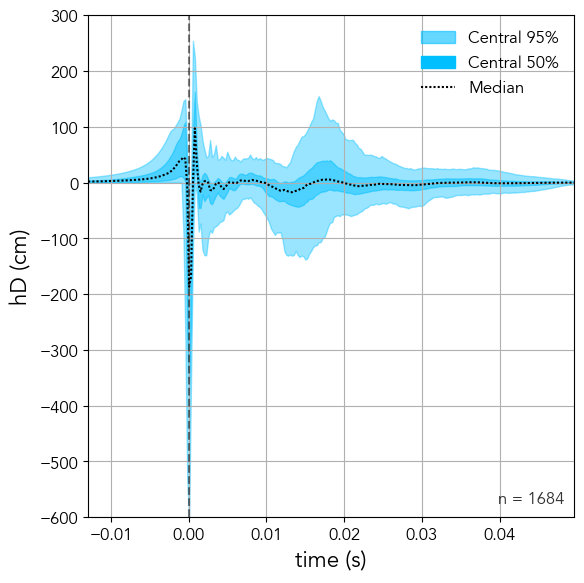

In [5]:
ccsn_dataset = CCSNData(noise=True, curriculum=True)
ccsn_dataset.plot_signal_distribution(background="white", font_family="sans-serif", font_name="Avenir", fname="plots/ccsn_signal_distribution.svg")

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


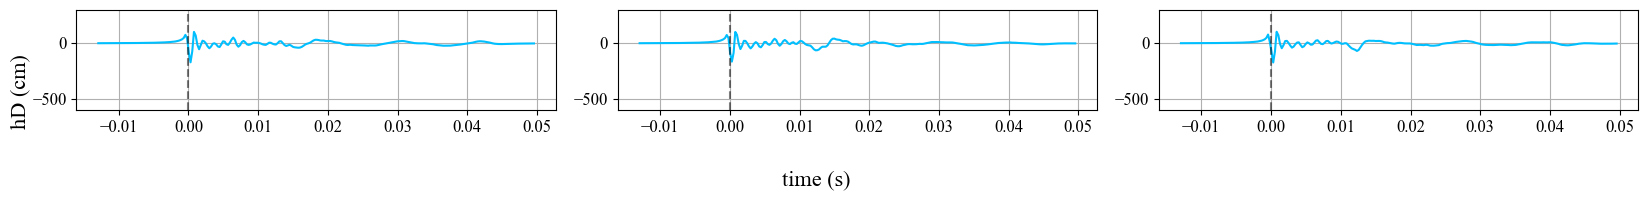

In [6]:
ccsn_dataset.plot_signal_grid(background="white", font_family="sans-serif", font_name="Avenir", fname="plots/ccsn_signal_grid.svg")

In [7]:
toy=False

### Train VAE + Flow


Verifying data alignment:
Number of signals: 1684
Number of parameter sets: 1684
Parameter columns: ['beta1_IC_b', 'A_300', 'A_467', 'A_634', 'A_1268', 'A_10000']
First few parameter values:
   beta1_IC_b  A_300  A_467  A_634  A_1268  A_10000
1    0.000749  False  False   True   False    False
2    0.002987  False  False   True   False    False
3    0.006661  False  False   True   False    False
4    0.011734  False  False   True   False    False
5    0.017965  False  False   True   False    False

Verifying data alignment:
Number of signals: 1684
Number of parameter sets: 1684
Parameter columns: ['beta1_IC_b', 'A_300', 'A_467', 'A_634', 'A_1268', 'A_10000']
First few parameter values:
   beta1_IC_b  A_300  A_467  A_634  A_1268  A_10000
1    0.000749  False  False   True   False    False
2    0.002987  False  False   True   False    False
3    0.006661  False  False   True   False    False
4    0.011734  False  False   True   False    False
5    0.017965  False  False   True   False  

Epochs:   0%|          | 0/256 [00:00<?, ?it/s]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1

Epoch 1/256 | Train Loss: 229.5950 | Val Loss: 102.4216


Epochs:   1%|          | 2/256 [00:06<12:18,  2.91s/it]

Epoch 2/256 | Train Loss: 80.9572 | Val Loss: 71.3782


Epochs:   1%|          | 3/256 [00:08<11:09,  2.65s/it]

Epoch 3/256 | Train Loss: 64.0054 | Val Loss: 63.5687


Epochs:   2%|▏         | 4/256 [00:10<10:29,  2.50s/it]

Epoch 4/256 | Train Loss: 57.7754 | Val Loss: 58.4761


Epochs:   2%|▏         | 5/256 [00:12<10:11,  2.44s/it]

Epoch 5/256 | Train Loss: 53.2324 | Val Loss: 54.4533


Epochs:   2%|▏         | 6/256 [00:15<09:58,  2.39s/it]

Epoch 6/256 | Train Loss: 49.9477 | Val Loss: 51.1875


Epochs:   3%|▎         | 7/256 [00:17<09:51,  2.38s/it]

Epoch 7/256 | Train Loss: 48.3006 | Val Loss: 51.0653


Epochs:   3%|▎         | 8/256 [00:19<09:44,  2.36s/it]

Epoch 8/256 | Train Loss: 46.7106 | Val Loss: 49.3616


Epochs:   4%|▎         | 9/256 [00:22<09:41,  2.35s/it]

Epoch 9/256 | Train Loss: 44.9776 | Val Loss: 48.9608


Epochs:   4%|▍         | 10/256 [00:24<09:38,  2.35s/it]

Epoch 10/256 | Train Loss: 43.5866 | Val Loss: 48.4935


Epochs:   4%|▍         | 11/256 [00:26<09:33,  2.34s/it]

Epoch 11/256 | Train Loss: 43.1846 | Val Loss: 45.7163


Epochs:   5%|▍         | 12/256 [00:29<09:29,  2.33s/it]

Epoch 12/256 | Train Loss: 41.7176 | Val Loss: 45.0832


Epochs:   5%|▌         | 13/256 [00:31<09:24,  2.32s/it]

Epoch 13/256 | Train Loss: 40.8882 | Val Loss: 44.6070


Epochs:   5%|▌         | 14/256 [00:33<09:22,  2.32s/it]

Epoch 14/256 | Train Loss: 40.1461 | Val Loss: 43.2037


Epochs:   6%|▌         | 15/256 [00:36<09:22,  2.33s/it]

Epoch 15/256 | Train Loss: 39.9732 | Val Loss: 45.3049
Epoch 16/256 | Train Loss: 39.0166 | Val Loss: 42.1955
Generated signals shape: (32, 256)
Epoch 16/256 | Train Loss: 39.0166 | Val Loss: 42.1955
Generated signals shape: (32, 256)


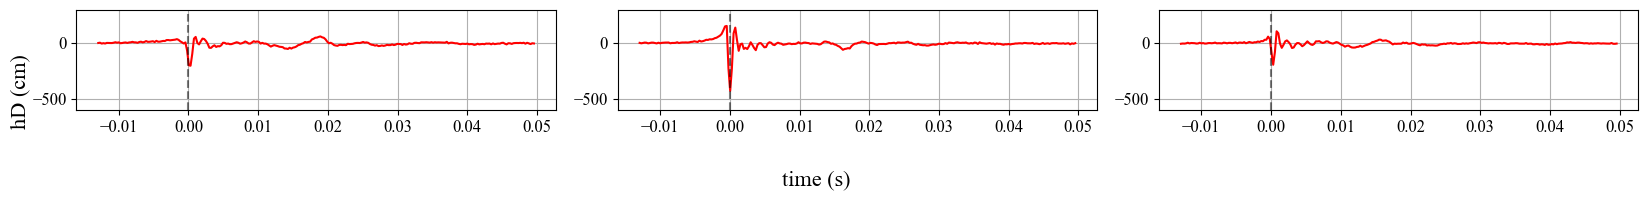

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


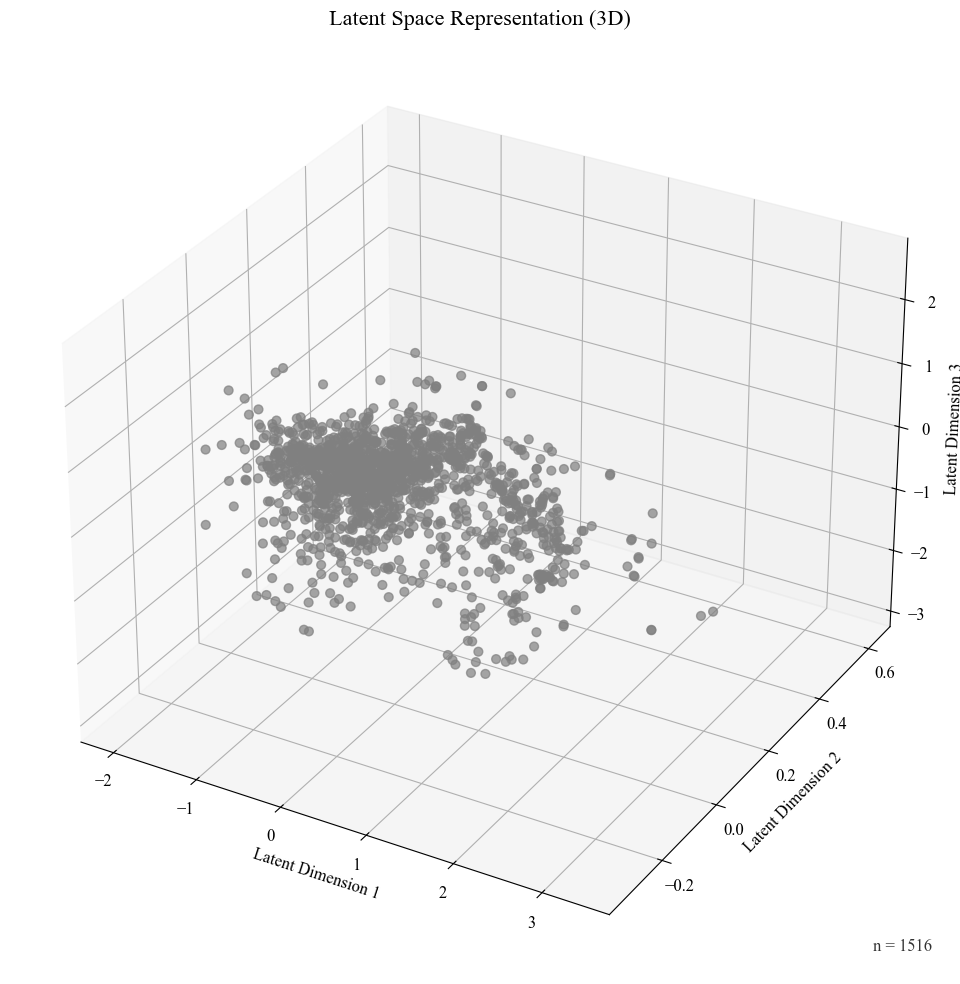

Epochs:   6%|▋         | 16/256 [00:40<11:13,  2.81s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 17/256 | Train Loss: 38.5579 | Val Loss: 41.4843


Epochs:   7%|▋         | 18/256 [00:44<10:13,  2.58s/it]

Epoch 18/256 | Train Loss: 38.5000 | Val Loss: 42.7715


Epochs:   7%|▋         | 19/256 [00:47<09:54,  2.51s/it]

Epoch 19/256 | Train Loss: 37.6760 | Val Loss: 41.5015


Epochs:   8%|▊         | 20/256 [00:49<09:39,  2.45s/it]

Epoch 20/256 | Train Loss: 37.5088 | Val Loss: 40.3483


Epochs:   8%|▊         | 21/256 [00:51<09:20,  2.39s/it]

Epoch 21/256 | Train Loss: 36.8399 | Val Loss: 41.2486


Epochs:   9%|▊         | 22/256 [00:53<09:06,  2.34s/it]

Epoch 22/256 | Train Loss: 36.5969 | Val Loss: 40.3776


Epochs:   9%|▉         | 23/256 [00:56<09:07,  2.35s/it]

Epoch 23/256 | Train Loss: 36.4089 | Val Loss: 40.5800


Epochs:   9%|▉         | 24/256 [00:58<09:03,  2.34s/it]

Epoch 24/256 | Train Loss: 36.4133 | Val Loss: 38.9249


Epochs:  10%|▉         | 25/256 [01:01<09:04,  2.36s/it]

Epoch 25/256 | Train Loss: 35.9020 | Val Loss: 39.5445


Epochs:  10%|█         | 26/256 [01:03<09:16,  2.42s/it]

Epoch 26/256 | Train Loss: 35.6067 | Val Loss: 39.7449


Epochs:  11%|█         | 27/256 [01:05<09:09,  2.40s/it]

Epoch 27/256 | Train Loss: 35.5585 | Val Loss: 39.2940


Epochs:  11%|█         | 28/256 [01:08<09:02,  2.38s/it]

Epoch 28/256 | Train Loss: 35.2268 | Val Loss: 39.2273


Epochs:  11%|█▏        | 29/256 [01:10<09:02,  2.39s/it]

Epoch 29/256 | Train Loss: 35.0637 | Val Loss: 39.5292


Epochs:  12%|█▏        | 30/256 [01:13<09:07,  2.42s/it]

Epoch 30/256 | Train Loss: 35.0879 | Val Loss: 39.7517


Epochs:  12%|█▏        | 31/256 [01:15<08:56,  2.38s/it]

Epoch 31/256 | Train Loss: 34.6197 | Val Loss: 38.5131
Epoch 32/256 | Train Loss: 34.3681 | Val Loss: 38.3496
Generated signals shape: (32, 256)
Epoch 32/256 | Train Loss: 34.3681 | Val Loss: 38.3496
Generated signals shape: (32, 256)


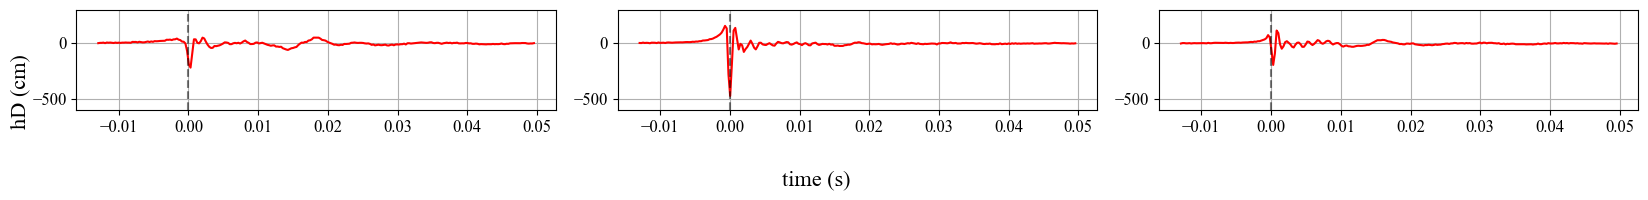

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


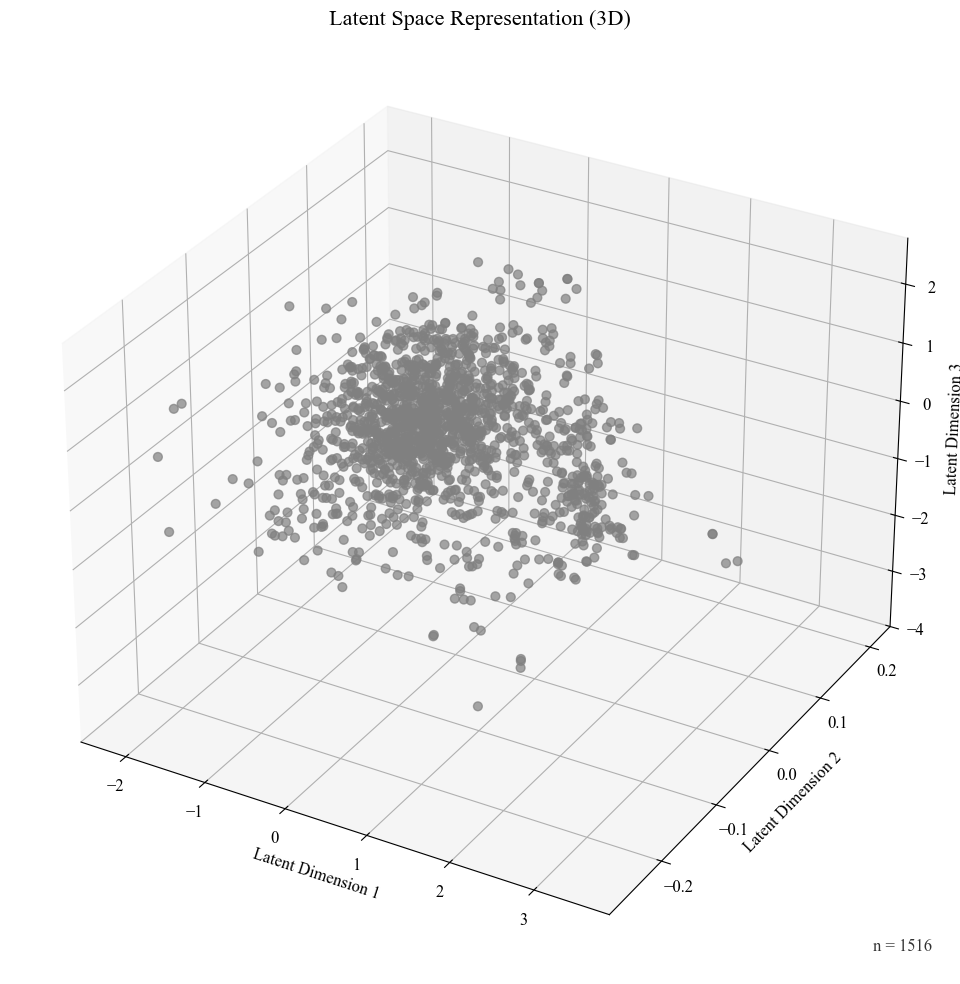

Epochs:  12%|█▎        | 32/256 [01:19<10:59,  2.95s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 33/256 | Train Loss: 34.3478 | Val Loss: 38.7450


Epochs:  13%|█▎        | 34/256 [01:24<09:47,  2.64s/it]

Epoch 34/256 | Train Loss: 34.1630 | Val Loss: 39.0828


Epochs:  14%|█▎        | 35/256 [01:26<09:30,  2.58s/it]

Epoch 35/256 | Train Loss: 33.8042 | Val Loss: 40.0532


Epochs:  14%|█▍        | 36/256 [01:29<09:20,  2.55s/it]

Epoch 36/256 | Train Loss: 33.8026 | Val Loss: 38.1501


Epochs:  14%|█▍        | 37/256 [01:31<09:04,  2.49s/it]

Epoch 37/256 | Train Loss: 33.6858 | Val Loss: 38.0771


Epochs:  15%|█▍        | 38/256 [01:34<08:57,  2.47s/it]

Epoch 38/256 | Train Loss: 33.4611 | Val Loss: 38.4835


Epochs:  15%|█▌        | 39/256 [01:36<08:58,  2.48s/it]

Epoch 39/256 | Train Loss: 33.7659 | Val Loss: 37.9295


Epochs:  16%|█▌        | 40/256 [01:39<08:50,  2.46s/it]

Epoch 40/256 | Train Loss: 33.2625 | Val Loss: 37.3577


Epochs:  16%|█▌        | 41/256 [01:41<08:37,  2.41s/it]

Epoch 41/256 | Train Loss: 33.1657 | Val Loss: 37.0734


Epochs:  16%|█▋        | 42/256 [01:43<08:29,  2.38s/it]

Epoch 42/256 | Train Loss: 33.0349 | Val Loss: 37.6538


Epochs:  17%|█▋        | 43/256 [01:46<08:30,  2.40s/it]

Epoch 43/256 | Train Loss: 33.2152 | Val Loss: 37.5607


Epochs:  17%|█▋        | 44/256 [01:48<08:28,  2.40s/it]

Epoch 44/256 | Train Loss: 32.9403 | Val Loss: 38.7701


Epochs:  18%|█▊        | 45/256 [01:50<08:27,  2.41s/it]

Epoch 45/256 | Train Loss: 33.1737 | Val Loss: 37.6780


Epochs:  18%|█▊        | 46/256 [01:53<08:27,  2.42s/it]

Epoch 46/256 | Train Loss: 33.0004 | Val Loss: 38.0196


Epochs:  18%|█▊        | 47/256 [01:55<08:28,  2.43s/it]

Epoch 47/256 | Train Loss: 32.6349 | Val Loss: 37.6745
Epoch 48/256 | Train Loss: 32.6085 | Val Loss: 37.2529
Generated signals shape: (32, 256)
Epoch 48/256 | Train Loss: 32.6085 | Val Loss: 37.2529
Generated signals shape: (32, 256)


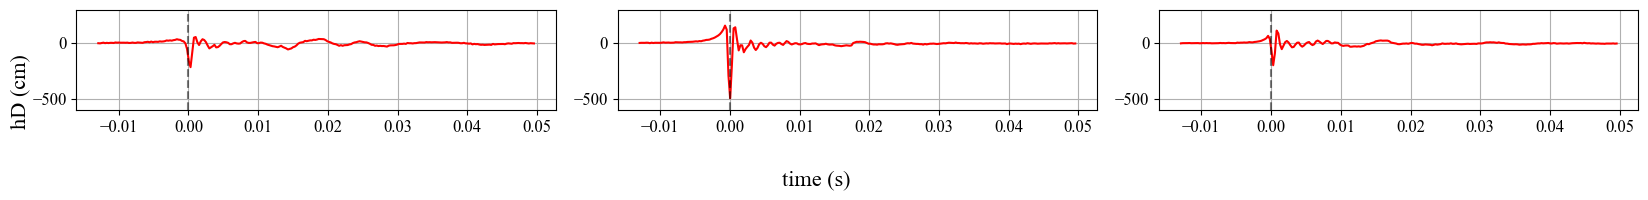

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


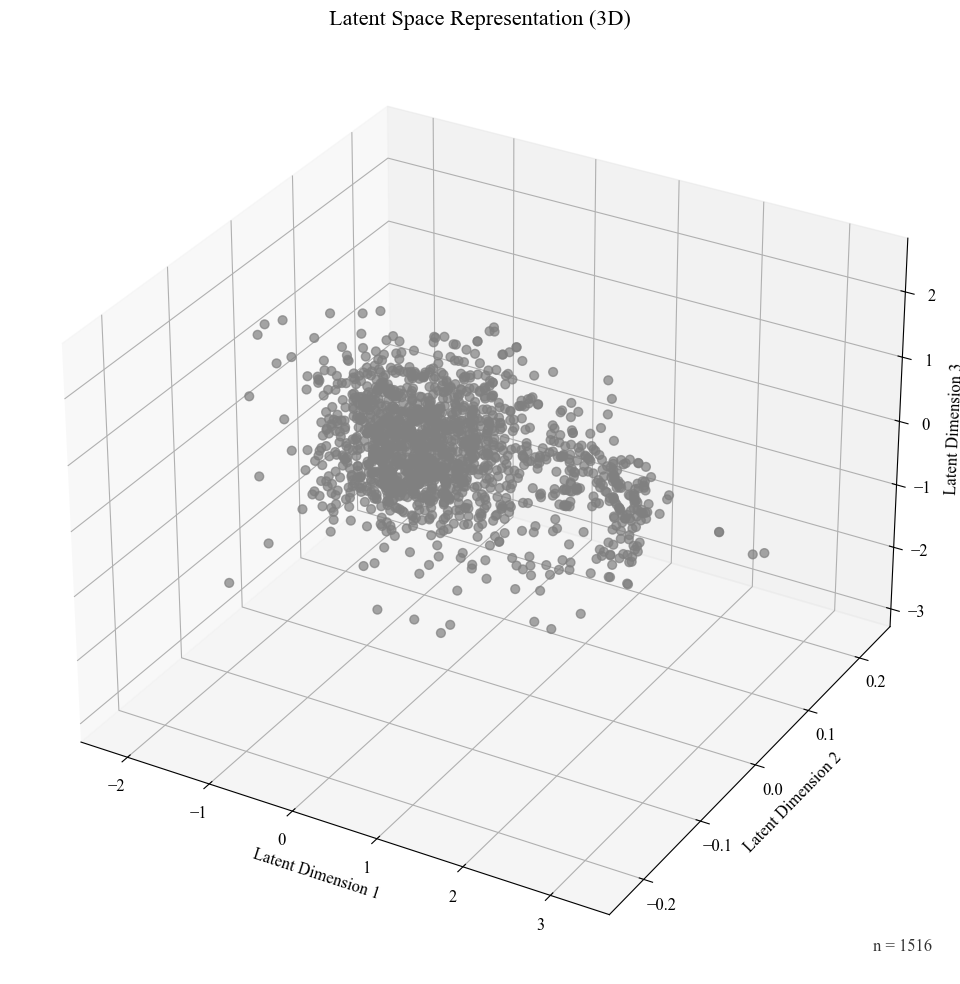

Epochs:  19%|█▉        | 48/256 [02:00<10:16,  2.96s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 49/256 | Train Loss: 32.3799 | Val Loss: 36.7435


Epochs:  20%|█▉        | 50/256 [02:04<09:02,  2.63s/it]

Epoch 50/256 | Train Loss: 32.2731 | Val Loss: 37.3710


Epochs:  20%|█▉        | 51/256 [02:07<08:41,  2.54s/it]

Epoch 51/256 | Train Loss: 32.0850 | Val Loss: 37.7790


Epochs:  20%|██        | 52/256 [02:09<08:35,  2.53s/it]

Epoch 52/256 | Train Loss: 32.2561 | Val Loss: 37.2253


Epochs:  21%|██        | 53/256 [02:11<08:22,  2.48s/it]

Epoch 53/256 | Train Loss: 32.1879 | Val Loss: 37.3409


Epochs:  21%|██        | 54/256 [02:14<08:20,  2.48s/it]

Epoch 54/256 | Train Loss: 31.9268 | Val Loss: 36.7197


Epochs:  21%|██▏       | 55/256 [02:16<08:14,  2.46s/it]

Epoch 55/256 | Train Loss: 32.0110 | Val Loss: 37.1029


Epochs:  22%|██▏       | 56/256 [02:19<08:09,  2.45s/it]

Epoch 56/256 | Train Loss: 31.9142 | Val Loss: 36.1354


Epochs:  22%|██▏       | 57/256 [02:21<08:03,  2.43s/it]

Epoch 57/256 | Train Loss: 31.9298 | Val Loss: 36.4712


Epochs:  23%|██▎       | 58/256 [02:23<07:57,  2.41s/it]

Epoch 58/256 | Train Loss: 31.8571 | Val Loss: 37.8880


Epochs:  23%|██▎       | 59/256 [02:26<07:57,  2.43s/it]

Epoch 59/256 | Train Loss: 31.9170 | Val Loss: 36.6012


Epochs:  23%|██▎       | 60/256 [02:28<07:58,  2.44s/it]

Epoch 60/256 | Train Loss: 32.0489 | Val Loss: 35.5793


Epochs:  24%|██▍       | 61/256 [02:31<07:45,  2.39s/it]

Epoch 61/256 | Train Loss: 31.6068 | Val Loss: 36.8127


Epochs:  24%|██▍       | 62/256 [02:33<07:44,  2.39s/it]

Epoch 62/256 | Train Loss: 31.6141 | Val Loss: 36.8679


Epochs:  25%|██▍       | 63/256 [02:35<07:41,  2.39s/it]

Epoch 63/256 | Train Loss: 31.8965 | Val Loss: 36.2601
Epoch 64/256 | Train Loss: 31.3794 | Val Loss: 36.3533
Generated signals shape: (32, 256)
Epoch 64/256 | Train Loss: 31.3794 | Val Loss: 36.3533
Generated signals shape: (32, 256)


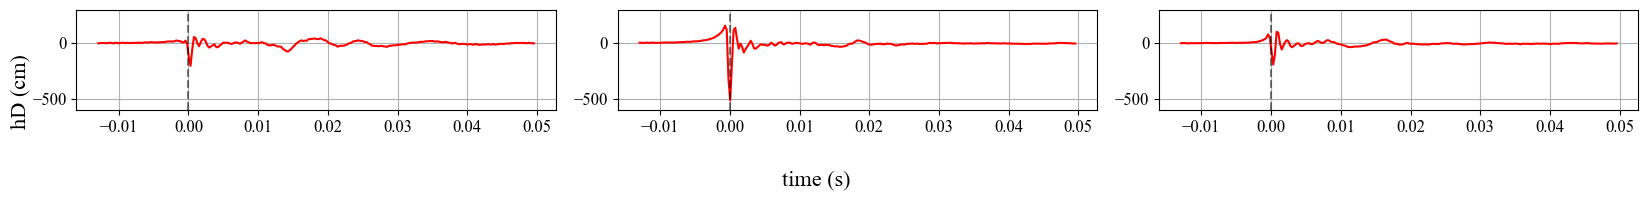

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


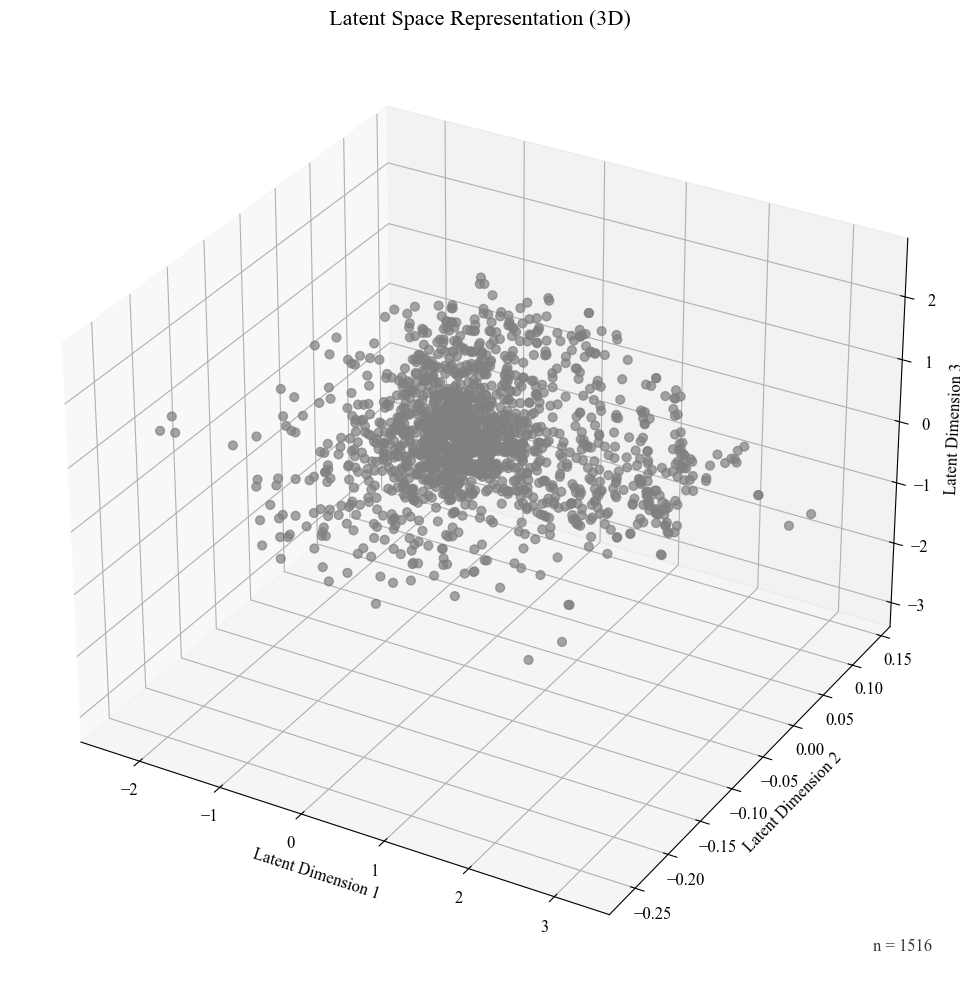

Epochs:  25%|██▌       | 64/256 [02:40<09:17,  2.90s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 65/256 | Train Loss: 31.5477 | Val Loss: 37.2650


Epochs:  26%|██▌       | 66/256 [02:44<08:12,  2.59s/it]

Epoch 66/256 | Train Loss: 31.2311 | Val Loss: 37.6013


Epochs:  26%|██▌       | 67/256 [02:47<07:55,  2.51s/it]

Epoch 67/256 | Train Loss: 31.2206 | Val Loss: 35.9239


Epochs:  27%|██▋       | 68/256 [02:49<07:45,  2.48s/it]

Epoch 68/256 | Train Loss: 31.6526 | Val Loss: 35.9748


Epochs:  27%|██▋       | 69/256 [02:51<07:44,  2.48s/it]

Epoch 69/256 | Train Loss: 31.0333 | Val Loss: 36.4574


Epochs:  27%|██▋       | 70/256 [02:54<07:27,  2.41s/it]

Epoch 70/256 | Train Loss: 31.2469 | Val Loss: 35.5201


Epochs:  28%|██▊       | 71/256 [02:56<07:28,  2.43s/it]

Epoch 71/256 | Train Loss: 31.3155 | Val Loss: 36.3837


Epochs:  28%|██▊       | 72/256 [02:58<07:21,  2.40s/it]

Epoch 72/256 | Train Loss: 31.1737 | Val Loss: 36.2400


Epochs:  29%|██▊       | 73/256 [03:01<07:22,  2.42s/it]

Epoch 73/256 | Train Loss: 31.1716 | Val Loss: 36.2031


Epochs:  29%|██▉       | 74/256 [03:03<07:20,  2.42s/it]

Epoch 74/256 | Train Loss: 30.9970 | Val Loss: 35.7318


Epochs:  29%|██▉       | 75/256 [03:06<07:21,  2.44s/it]

Epoch 75/256 | Train Loss: 30.8491 | Val Loss: 35.8110


Epochs:  30%|██▉       | 76/256 [03:08<07:20,  2.45s/it]

Epoch 76/256 | Train Loss: 31.2187 | Val Loss: 35.9314


Epochs:  30%|███       | 77/256 [03:11<07:15,  2.43s/it]

Epoch 77/256 | Train Loss: 31.0256 | Val Loss: 36.3575


Epochs:  30%|███       | 78/256 [03:13<07:09,  2.41s/it]

Epoch 78/256 | Train Loss: 30.6295 | Val Loss: 36.6285


Epochs:  31%|███       | 79/256 [03:15<07:05,  2.40s/it]

Epoch 79/256 | Train Loss: 30.7405 | Val Loss: 36.7111
Epoch 80/256 | Train Loss: 30.5468 | Val Loss: 35.9432
Generated signals shape: (32, 256)
Epoch 80/256 | Train Loss: 30.5468 | Val Loss: 35.9432
Generated signals shape: (32, 256)


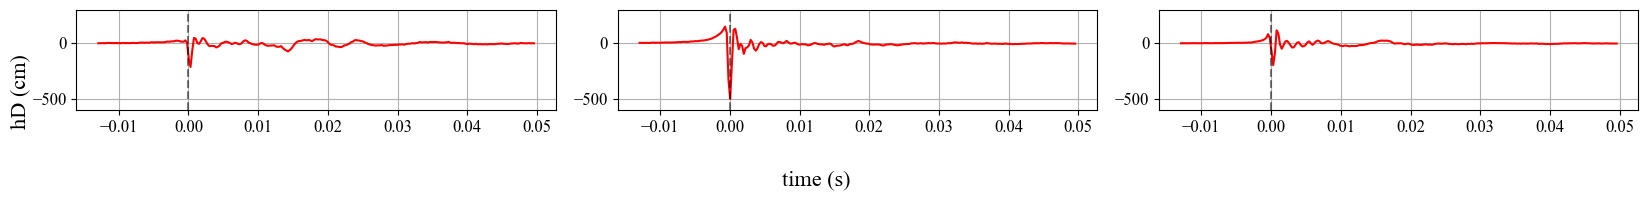

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


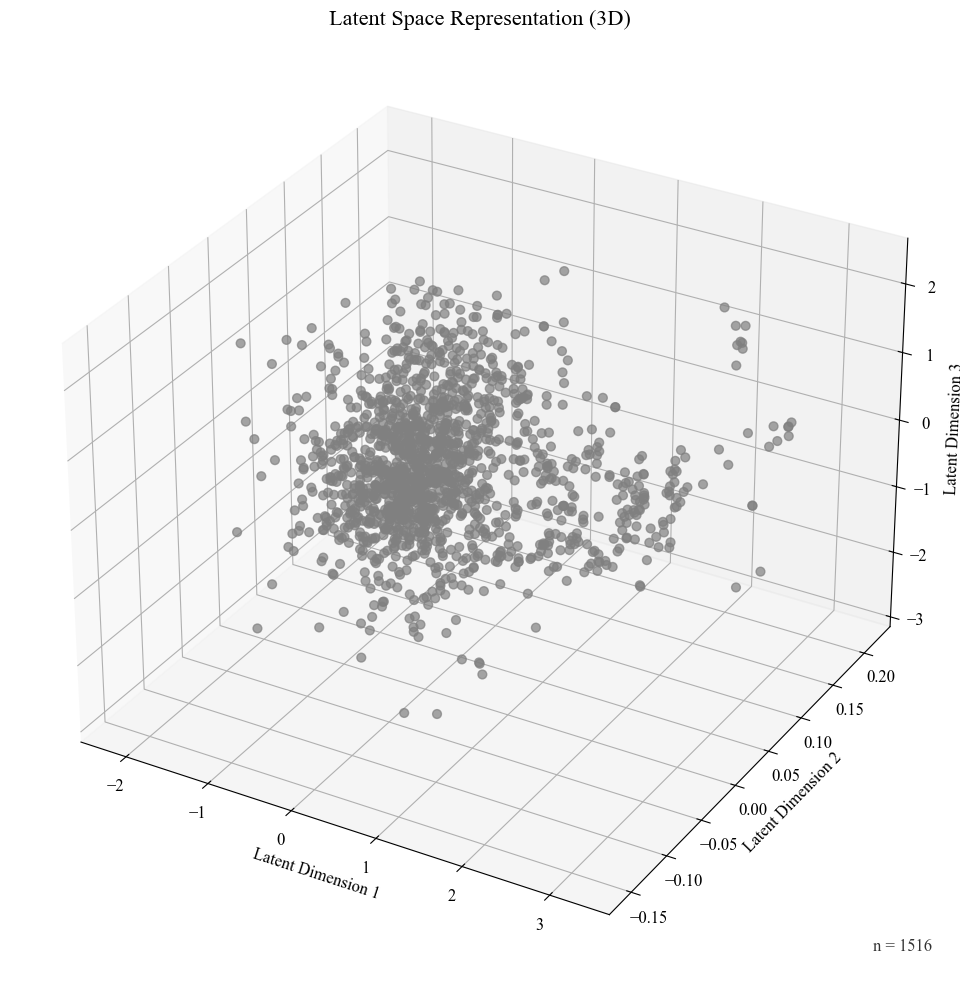

Epochs:  31%|███▏      | 80/256 [03:20<08:38,  2.95s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 81/256 | Train Loss: 30.5792 | Val Loss: 35.9014


Epochs:  32%|███▏      | 82/256 [03:25<07:45,  2.68s/it]

Epoch 82/256 | Train Loss: 29.2137 | Val Loss: 34.0306


Epochs:  32%|███▏      | 83/256 [03:27<07:28,  2.59s/it]

Epoch 83/256 | Train Loss: 28.2575 | Val Loss: 33.3466


Epochs:  33%|███▎      | 84/256 [03:29<07:16,  2.54s/it]

Epoch 84/256 | Train Loss: 28.1136 | Val Loss: 33.7201


Epochs:  33%|███▎      | 85/256 [03:32<07:07,  2.50s/it]

Epoch 85/256 | Train Loss: 28.2398 | Val Loss: 33.5687


Epochs:  34%|███▎      | 86/256 [03:34<07:00,  2.47s/it]

Epoch 86/256 | Train Loss: 28.1827 | Val Loss: 33.5894


Epochs:  34%|███▍      | 87/256 [03:37<06:54,  2.45s/it]

Epoch 87/256 | Train Loss: 28.1074 | Val Loss: 33.8362


Epochs:  34%|███▍      | 88/256 [03:39<06:47,  2.42s/it]

Epoch 88/256 | Train Loss: 28.0617 | Val Loss: 34.0109


Epochs:  35%|███▍      | 89/256 [03:41<06:43,  2.42s/it]

Epoch 89/256 | Train Loss: 28.0120 | Val Loss: 33.9345


Epochs:  35%|███▌      | 90/256 [03:44<06:39,  2.41s/it]

Epoch 90/256 | Train Loss: 28.0862 | Val Loss: 33.1472


Epochs:  36%|███▌      | 91/256 [03:46<06:36,  2.40s/it]

Epoch 91/256 | Train Loss: 27.9673 | Val Loss: 33.1980


Epochs:  36%|███▌      | 92/256 [03:48<06:34,  2.40s/it]

Epoch 92/256 | Train Loss: 27.8305 | Val Loss: 33.6967


Epochs:  36%|███▋      | 93/256 [03:51<06:30,  2.39s/it]

Epoch 93/256 | Train Loss: 27.8613 | Val Loss: 32.7038


Epochs:  37%|███▋      | 94/256 [03:53<06:24,  2.37s/it]

Epoch 94/256 | Train Loss: 27.8275 | Val Loss: 33.3172


Epochs:  37%|███▋      | 95/256 [03:56<06:21,  2.37s/it]

Epoch 95/256 | Train Loss: 27.8389 | Val Loss: 33.1775
Epoch 96/256 | Train Loss: 27.6897 | Val Loss: 33.4157
Generated signals shape: (32, 256)
Epoch 96/256 | Train Loss: 27.6897 | Val Loss: 33.4157
Generated signals shape: (32, 256)


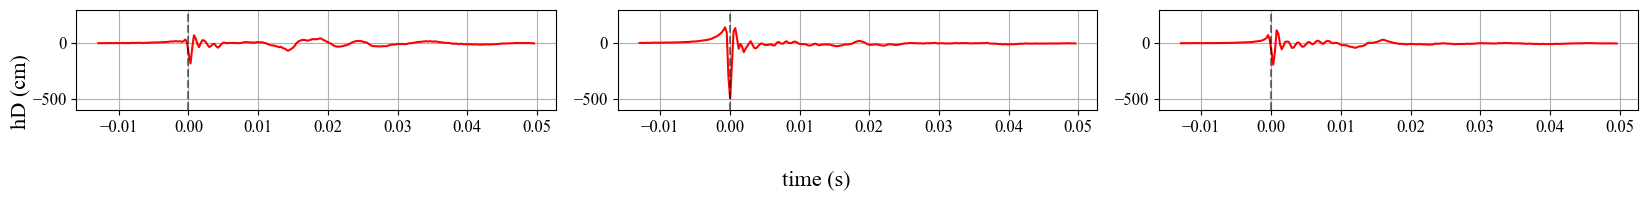

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


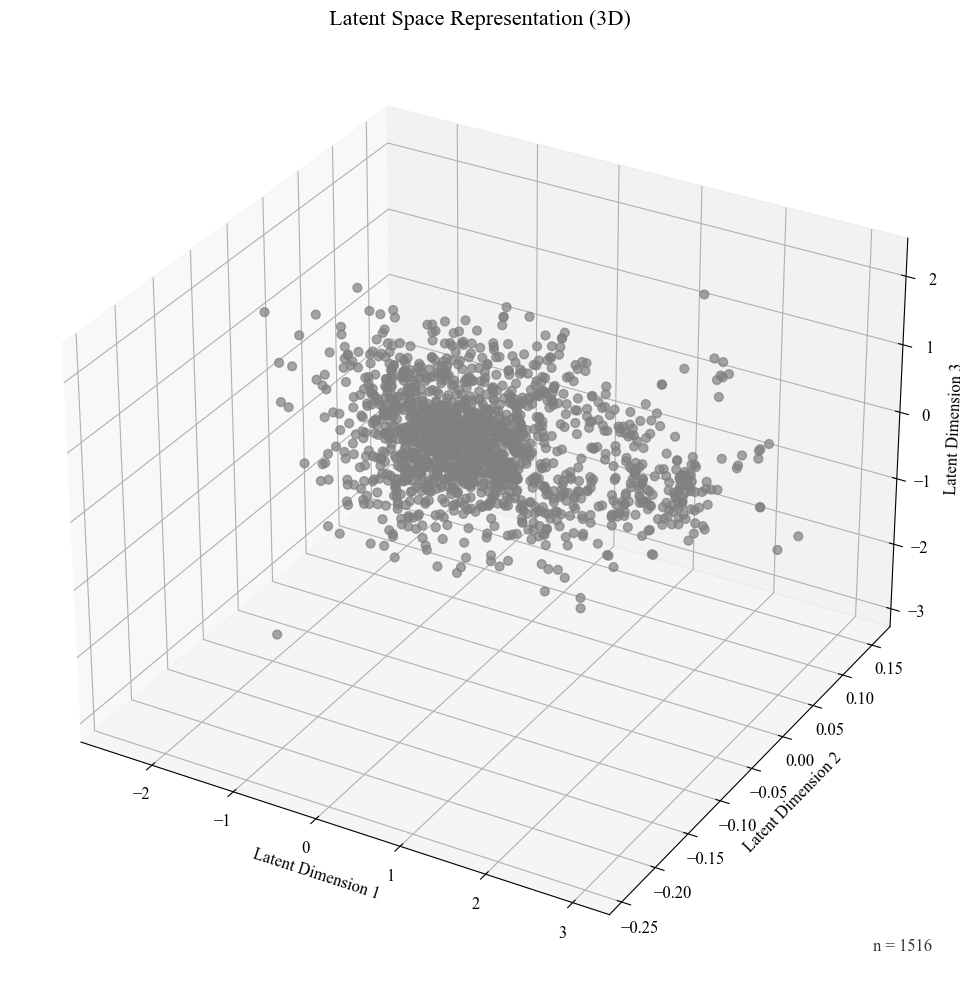

Epochs:  38%|███▊      | 96/256 [04:00<07:43,  2.90s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 97/256 | Train Loss: 27.9671 | Val Loss: 33.9507


Epochs:  38%|███▊      | 98/256 [04:04<06:52,  2.61s/it]

Epoch 98/256 | Train Loss: 27.4799 | Val Loss: 33.7360


Epochs:  39%|███▊      | 99/256 [04:07<06:41,  2.56s/it]

Epoch 99/256 | Train Loss: 27.9837 | Val Loss: 33.4150


Epochs:  39%|███▉      | 100/256 [04:09<06:28,  2.49s/it]

Epoch 100/256 | Train Loss: 27.8603 | Val Loss: 33.8041


Epochs:  39%|███▉      | 101/256 [04:11<06:20,  2.46s/it]

Epoch 101/256 | Train Loss: 27.5334 | Val Loss: 32.7225


Epochs:  40%|███▉      | 102/256 [04:14<06:10,  2.40s/it]

Epoch 102/256 | Train Loss: 27.8657 | Val Loss: 34.2606


Epochs:  40%|████      | 103/256 [04:16<06:04,  2.38s/it]

Epoch 103/256 | Train Loss: 27.5393 | Val Loss: 33.6186


Epochs:  41%|████      | 104/256 [04:18<06:00,  2.37s/it]

Epoch 104/256 | Train Loss: 27.5777 | Val Loss: 33.2445


Epochs:  41%|████      | 105/256 [04:21<05:57,  2.37s/it]

Epoch 105/256 | Train Loss: 26.8002 | Val Loss: 32.6454


Epochs:  41%|████▏     | 106/256 [04:23<05:52,  2.35s/it]

Epoch 106/256 | Train Loss: 26.4491 | Val Loss: 32.2293


Epochs:  42%|████▏     | 107/256 [04:26<06:01,  2.43s/it]

Epoch 107/256 | Train Loss: 26.5546 | Val Loss: 32.7651


Epochs:  42%|████▏     | 108/256 [04:28<05:57,  2.42s/it]

Epoch 108/256 | Train Loss: 26.4975 | Val Loss: 32.1653


Epochs:  43%|████▎     | 109/256 [04:30<05:49,  2.38s/it]

Epoch 109/256 | Train Loss: 26.4897 | Val Loss: 31.7391


Epochs:  43%|████▎     | 110/256 [04:33<05:44,  2.36s/it]

Epoch 110/256 | Train Loss: 26.2881 | Val Loss: 32.2149


Epochs:  43%|████▎     | 111/256 [04:35<05:40,  2.35s/it]

Epoch 111/256 | Train Loss: 26.4199 | Val Loss: 32.6167
Epoch 112/256 | Train Loss: 26.2277 | Val Loss: 32.0424
Generated signals shape: (32, 256)
Epoch 112/256 | Train Loss: 26.2277 | Val Loss: 32.0424
Generated signals shape: (32, 256)


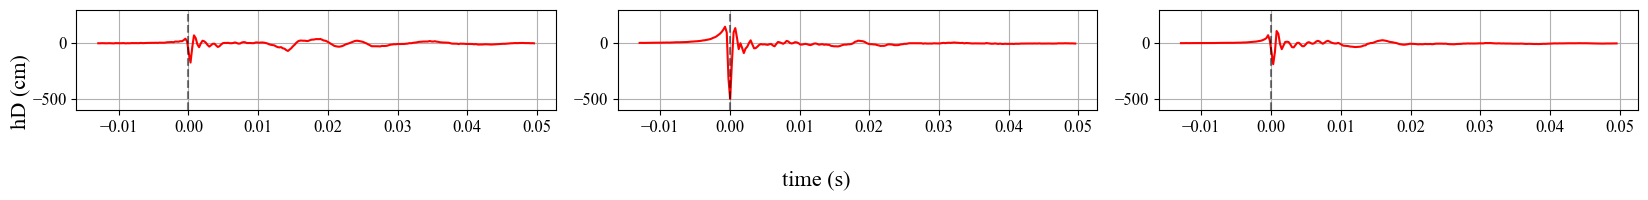

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


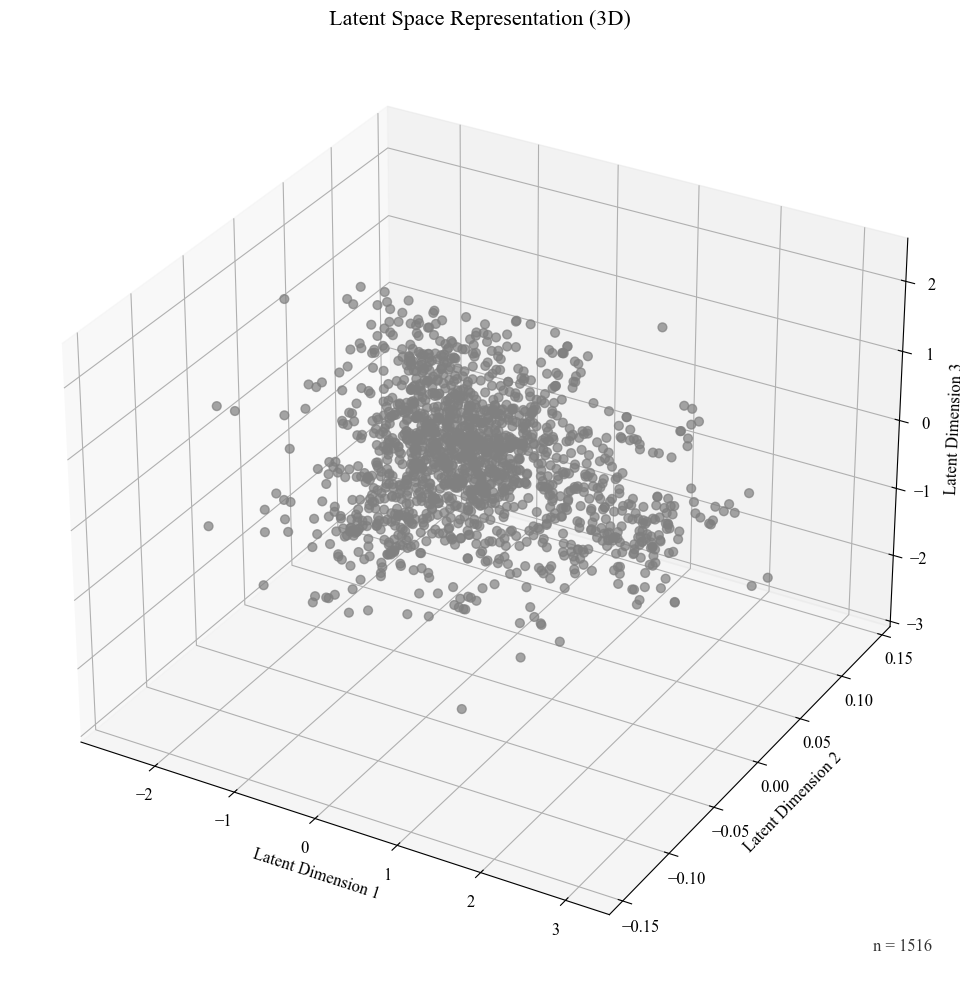

Epochs:  44%|████▍     | 112/256 [04:39<06:59,  2.91s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 113/256 | Train Loss: 26.1682 | Val Loss: 32.4845


Epochs:  45%|████▍     | 114/256 [04:44<06:17,  2.66s/it]

Epoch 114/256 | Train Loss: 26.1325 | Val Loss: 31.8870


Epochs:  45%|████▍     | 115/256 [04:46<06:00,  2.55s/it]

Epoch 115/256 | Train Loss: 26.0172 | Val Loss: 32.3458


Epochs:  45%|████▌     | 116/256 [04:49<05:51,  2.51s/it]

Epoch 116/256 | Train Loss: 26.3179 | Val Loss: 31.6496


Epochs:  46%|████▌     | 117/256 [04:51<05:39,  2.44s/it]

Epoch 117/256 | Train Loss: 26.1486 | Val Loss: 32.8892


Epochs:  46%|████▌     | 118/256 [04:53<05:29,  2.39s/it]

Epoch 118/256 | Train Loss: 26.1123 | Val Loss: 32.5077


Epochs:  46%|████▋     | 119/256 [04:56<05:26,  2.38s/it]

Epoch 119/256 | Train Loss: 26.2093 | Val Loss: 32.1862


Epochs:  47%|████▋     | 120/256 [04:58<05:24,  2.39s/it]

Epoch 120/256 | Train Loss: 26.0933 | Val Loss: 32.3095


Epochs:  47%|████▋     | 121/256 [05:00<05:20,  2.37s/it]

Epoch 121/256 | Train Loss: 26.1302 | Val Loss: 32.4120


Epochs:  48%|████▊     | 122/256 [05:03<05:18,  2.37s/it]

Epoch 122/256 | Train Loss: 26.2283 | Val Loss: 31.9071


Epochs:  48%|████▊     | 123/256 [05:05<05:14,  2.37s/it]

Epoch 123/256 | Train Loss: 26.0566 | Val Loss: 31.7862


Epochs:  48%|████▊     | 124/256 [05:08<05:11,  2.36s/it]

Epoch 124/256 | Train Loss: 26.1302 | Val Loss: 32.1555


Epochs:  49%|████▉     | 125/256 [05:10<05:10,  2.37s/it]

Epoch 125/256 | Train Loss: 26.0443 | Val Loss: 32.5203


Epochs:  49%|████▉     | 126/256 [05:12<05:02,  2.33s/it]

Epoch 126/256 | Train Loss: 25.9680 | Val Loss: 32.0525


Epochs:  50%|████▉     | 127/256 [05:14<04:57,  2.31s/it]

Epoch 127/256 | Train Loss: 26.0102 | Val Loss: 32.3750
Epoch 128/256 | Train Loss: 25.4880 | Val Loss: 31.7412
Generated signals shape: (32, 256)
Epoch 128/256 | Train Loss: 25.4880 | Val Loss: 31.7412
Generated signals shape: (32, 256)


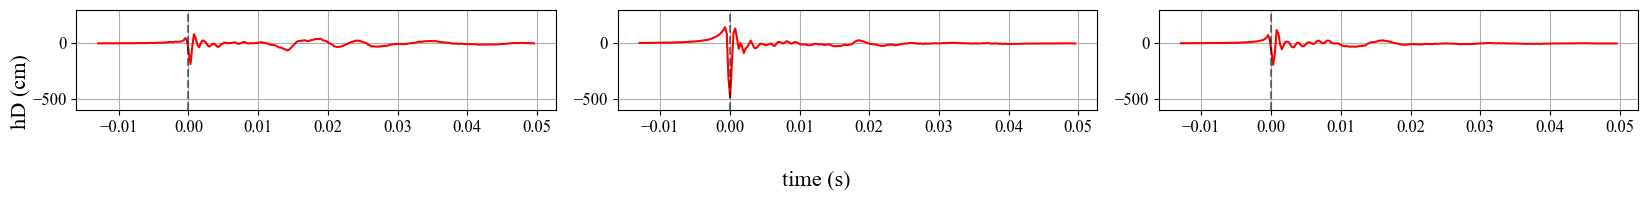

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


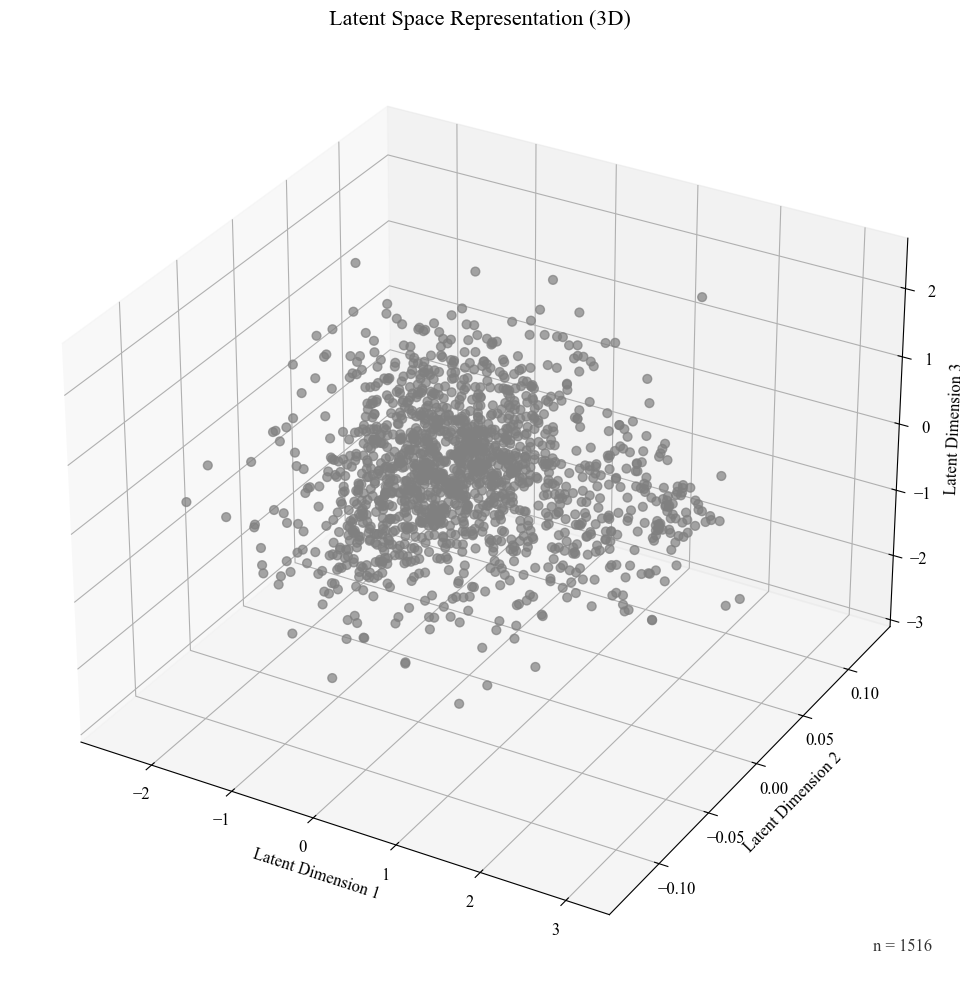

Epochs:  50%|█████     | 128/256 [05:18<06:01,  2.82s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 129/256 | Train Loss: 25.4598 | Val Loss: 32.2190


Epochs:  51%|█████     | 130/256 [05:23<05:20,  2.54s/it]

Epoch 130/256 | Train Loss: 25.4667 | Val Loss: 31.5186


Epochs:  51%|█████     | 131/256 [05:25<05:07,  2.46s/it]

Epoch 131/256 | Train Loss: 25.3649 | Val Loss: 32.0360


Epochs:  52%|█████▏    | 132/256 [05:28<05:07,  2.48s/it]

Epoch 132/256 | Train Loss: 25.4803 | Val Loss: 31.7557


Epochs:  52%|█████▏    | 133/256 [05:30<05:02,  2.46s/it]

Epoch 133/256 | Train Loss: 25.5110 | Val Loss: 31.5648


Epochs:  52%|█████▏    | 134/256 [05:33<04:56,  2.43s/it]

Epoch 134/256 | Train Loss: 25.3426 | Val Loss: 31.3980


Epochs:  53%|█████▎    | 135/256 [05:35<04:47,  2.38s/it]

Epoch 135/256 | Train Loss: 25.4170 | Val Loss: 31.9341


Epochs:  53%|█████▎    | 136/256 [05:37<04:38,  2.32s/it]

Epoch 136/256 | Train Loss: 25.2999 | Val Loss: 31.3598


Epochs:  54%|█████▎    | 137/256 [05:39<04:32,  2.29s/it]

Epoch 137/256 | Train Loss: 25.2798 | Val Loss: 31.5028


Epochs:  54%|█████▍    | 138/256 [05:41<04:27,  2.27s/it]

Epoch 138/256 | Train Loss: 25.3953 | Val Loss: 31.1710


Epochs:  54%|█████▍    | 139/256 [05:44<04:28,  2.29s/it]

Epoch 139/256 | Train Loss: 25.3184 | Val Loss: 31.3139


Epochs:  55%|█████▍    | 140/256 [05:46<04:23,  2.27s/it]

Epoch 140/256 | Train Loss: 25.1572 | Val Loss: 32.3012


Epochs:  55%|█████▌    | 141/256 [05:48<04:19,  2.26s/it]

Epoch 141/256 | Train Loss: 25.2101 | Val Loss: 31.7180


Epochs:  55%|█████▌    | 142/256 [05:51<04:27,  2.35s/it]

Epoch 142/256 | Train Loss: 25.2650 | Val Loss: 31.6740


Epochs:  56%|█████▌    | 143/256 [05:53<04:21,  2.31s/it]

Epoch 143/256 | Train Loss: 25.4118 | Val Loss: 32.1146
Epoch 144/256 | Train Loss: 25.3219 | Val Loss: 31.4983
Generated signals shape: (32, 256)
Epoch 144/256 | Train Loss: 25.3219 | Val Loss: 31.4983
Generated signals shape: (32, 256)


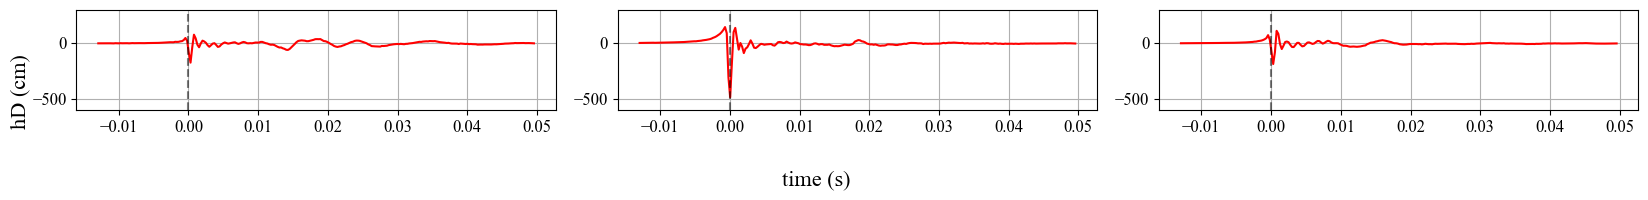

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


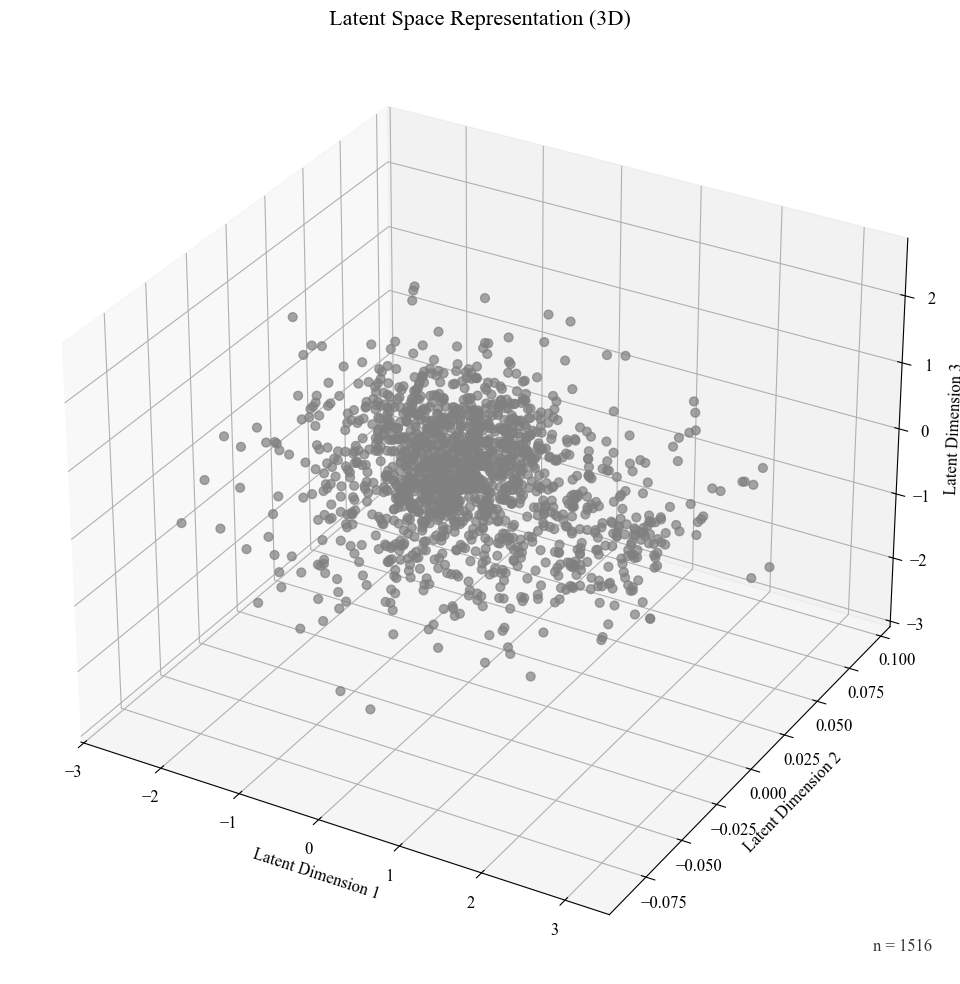

Epochs:  56%|█████▋    | 144/256 [05:57<05:19,  2.86s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 145/256 | Train Loss: 25.3326 | Val Loss: 31.6716


Epochs:  57%|█████▋    | 146/256 [06:02<04:39,  2.54s/it]

Epoch 146/256 | Train Loss: 25.2335 | Val Loss: 31.9089


Epochs:  57%|█████▋    | 147/256 [06:04<04:26,  2.45s/it]

Epoch 147/256 | Train Loss: 25.0937 | Val Loss: 31.0326


Epochs:  58%|█████▊    | 148/256 [06:06<04:16,  2.38s/it]

Epoch 148/256 | Train Loss: 25.3069 | Val Loss: 31.4934


Epochs:  58%|█████▊    | 149/256 [06:08<04:06,  2.30s/it]

Epoch 149/256 | Train Loss: 25.1444 | Val Loss: 31.3724


Epochs:  59%|█████▊    | 150/256 [06:10<03:58,  2.25s/it]

Epoch 150/256 | Train Loss: 25.3648 | Val Loss: 31.4313


Epochs:  59%|█████▉    | 151/256 [06:12<03:52,  2.22s/it]

Epoch 151/256 | Train Loss: 25.0751 | Val Loss: 31.6569


Epochs:  59%|█████▉    | 152/256 [06:15<03:52,  2.24s/it]

Epoch 152/256 | Train Loss: 25.1724 | Val Loss: 32.1604


Epochs:  60%|█████▉    | 153/256 [06:17<03:46,  2.20s/it]

Epoch 153/256 | Train Loss: 25.3045 | Val Loss: 31.7447


Epochs:  60%|██████    | 154/256 [06:19<03:44,  2.20s/it]

Epoch 154/256 | Train Loss: 25.0808 | Val Loss: 31.5347


Epochs:  61%|██████    | 155/256 [06:21<03:42,  2.20s/it]

Epoch 155/256 | Train Loss: 25.2268 | Val Loss: 31.5150


Epochs:  61%|██████    | 156/256 [06:23<03:40,  2.21s/it]

Epoch 156/256 | Train Loss: 25.2135 | Val Loss: 31.3194


Epochs:  61%|██████▏   | 157/256 [06:26<03:37,  2.20s/it]

Epoch 157/256 | Train Loss: 25.0979 | Val Loss: 31.3431


Epochs:  62%|██████▏   | 158/256 [06:28<03:37,  2.22s/it]

Epoch 158/256 | Train Loss: 25.1312 | Val Loss: 31.8358


Epochs:  62%|██████▏   | 159/256 [06:30<03:30,  2.17s/it]

Epoch 159/256 | Train Loss: 24.9754 | Val Loss: 31.1350
Epoch 160/256 | Train Loss: 24.9779 | Val Loss: 30.8917
Generated signals shape: (32, 256)
Epoch 160/256 | Train Loss: 24.9779 | Val Loss: 30.8917
Generated signals shape: (32, 256)


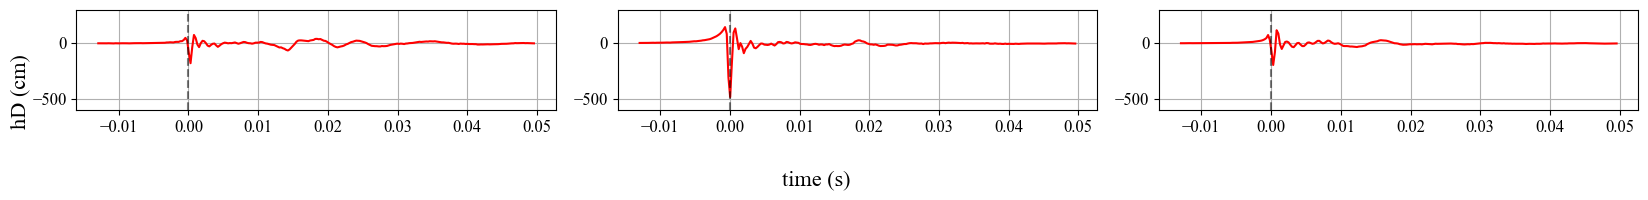

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


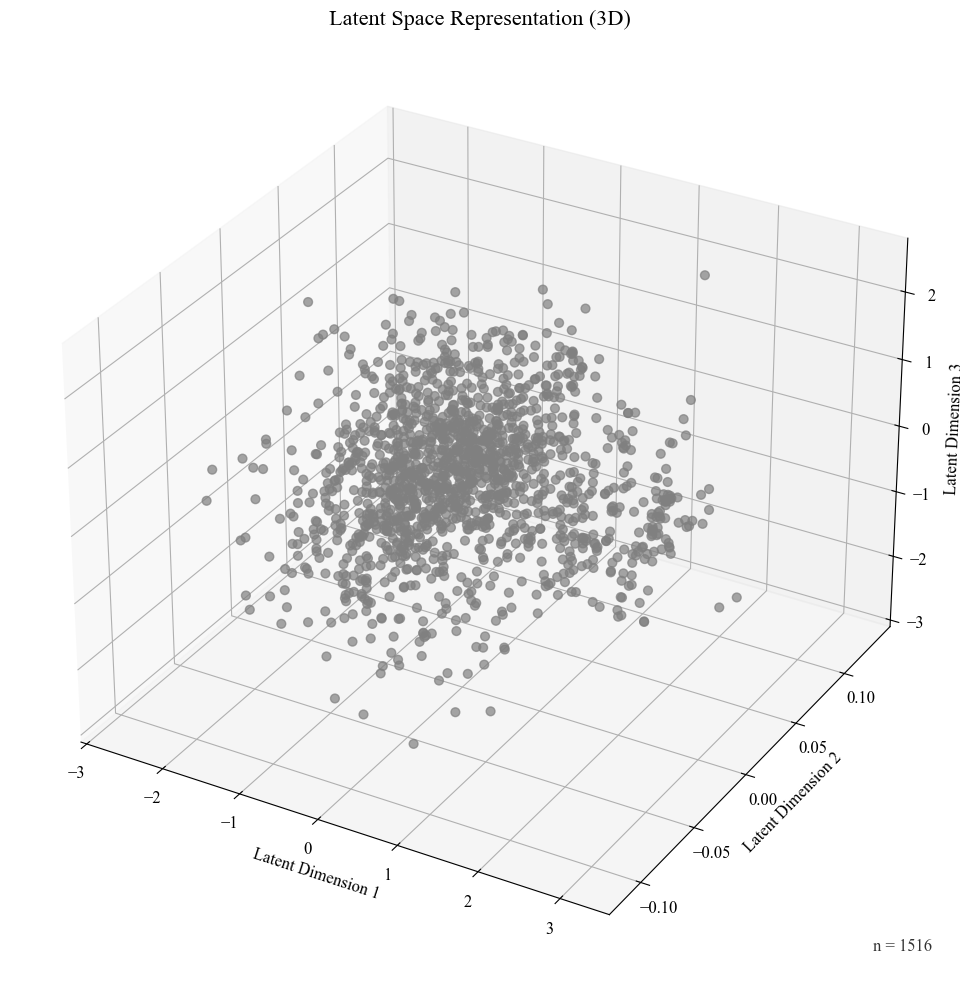

Epochs:  62%|██████▎   | 160/256 [06:34<04:21,  2.72s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 161/256 | Train Loss: 25.0400 | Val Loss: 31.0646


Epochs:  63%|██████▎   | 162/256 [06:38<03:51,  2.46s/it]

Epoch 162/256 | Train Loss: 24.8266 | Val Loss: 31.7947


Epochs:  64%|██████▎   | 163/256 [06:41<03:46,  2.43s/it]

Epoch 163/256 | Train Loss: 24.9016 | Val Loss: 31.4081


Epochs:  64%|██████▍   | 164/256 [06:43<03:43,  2.43s/it]

Epoch 164/256 | Train Loss: 24.9619 | Val Loss: 31.1324


Epochs:  64%|██████▍   | 165/256 [06:46<03:38,  2.40s/it]

Epoch 165/256 | Train Loss: 24.7690 | Val Loss: 32.0205


Epochs:  65%|██████▍   | 166/256 [06:48<03:33,  2.37s/it]

Epoch 166/256 | Train Loss: 24.7351 | Val Loss: 31.7747


Epochs:  65%|██████▌   | 167/256 [06:50<03:29,  2.35s/it]

Epoch 167/256 | Train Loss: 24.8459 | Val Loss: 32.0399


Epochs:  66%|██████▌   | 168/256 [06:52<03:23,  2.31s/it]

Epoch 168/256 | Train Loss: 24.7695 | Val Loss: 31.4173


Epochs:  66%|██████▌   | 169/256 [06:55<03:18,  2.29s/it]

Epoch 169/256 | Train Loss: 24.7699 | Val Loss: 31.8643


Epochs:  66%|██████▋   | 170/256 [06:57<03:13,  2.25s/it]

Epoch 170/256 | Train Loss: 24.8132 | Val Loss: 31.0778


Epochs:  67%|██████▋   | 171/256 [06:59<03:12,  2.26s/it]

Epoch 171/256 | Train Loss: 24.7819 | Val Loss: 31.5368


Epochs:  67%|██████▋   | 172/256 [07:01<03:08,  2.24s/it]

Epoch 172/256 | Train Loss: 24.8323 | Val Loss: 31.7456


Epochs:  68%|██████▊   | 173/256 [07:03<03:04,  2.23s/it]

Epoch 173/256 | Train Loss: 24.8385 | Val Loss: 31.7687


Epochs:  68%|██████▊   | 174/256 [07:06<03:01,  2.21s/it]

Epoch 174/256 | Train Loss: 24.8286 | Val Loss: 31.3289


Epochs:  68%|██████▊   | 175/256 [07:08<02:58,  2.21s/it]

Epoch 175/256 | Train Loss: 24.6808 | Val Loss: 31.6372
Epoch 176/256 | Train Loss: 24.8586 | Val Loss: 31.5783
Generated signals shape: (32, 256)
Epoch 176/256 | Train Loss: 24.8586 | Val Loss: 31.5783
Generated signals shape: (32, 256)


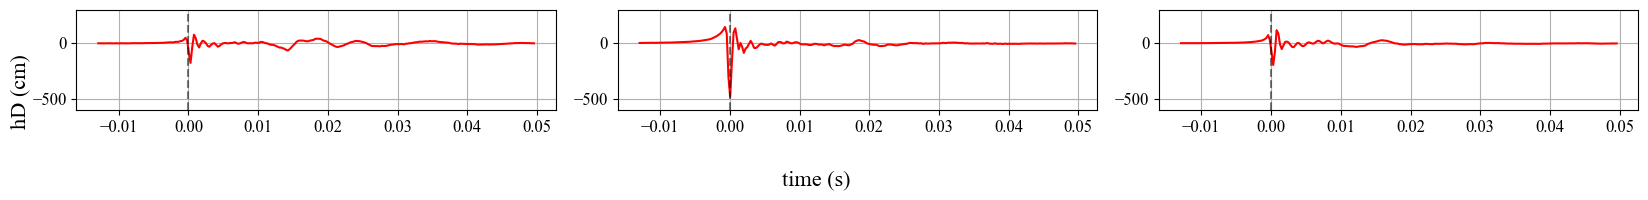

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


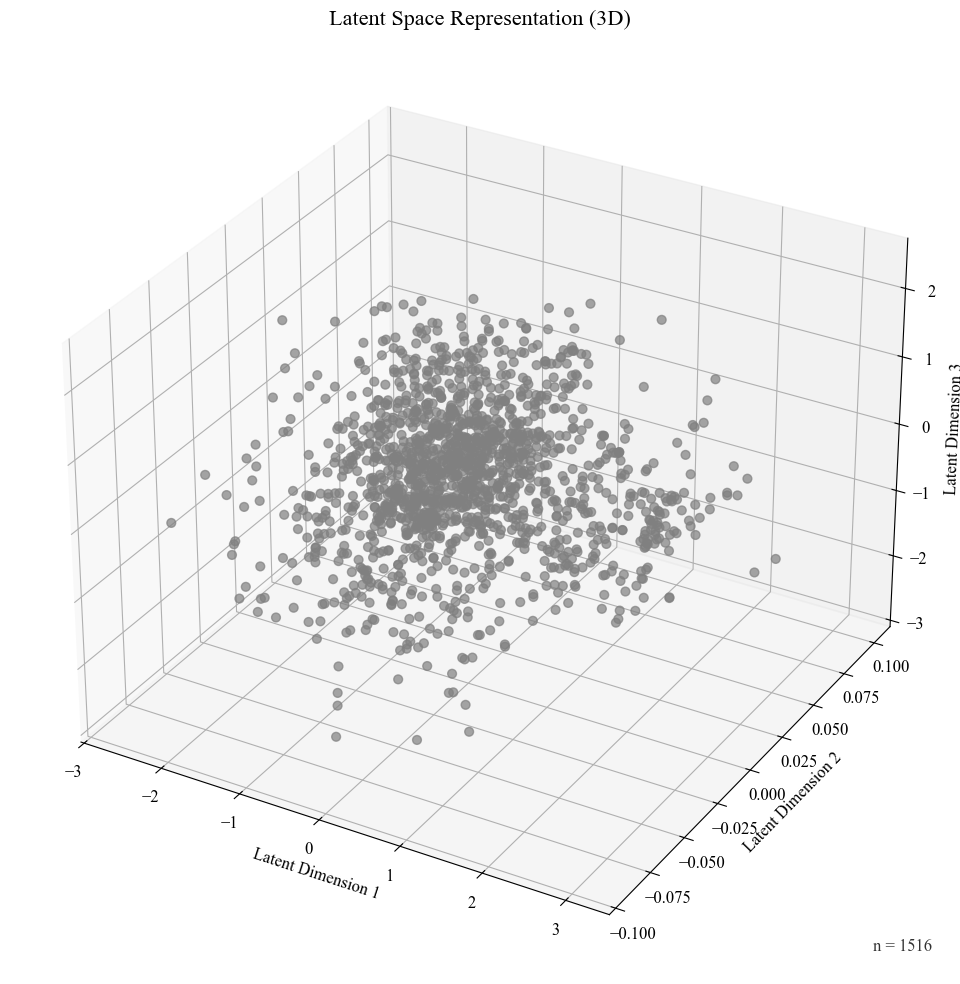

Epochs:  69%|██████▉   | 176/256 [07:12<03:43,  2.79s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 177/256 | Train Loss: 24.5134 | Val Loss: 31.5424


Epochs:  70%|██████▉   | 178/256 [07:16<03:13,  2.48s/it]

Epoch 178/256 | Train Loss: 24.5606 | Val Loss: 30.9267


Epochs:  70%|██████▉   | 179/256 [07:18<03:02,  2.37s/it]

Epoch 179/256 | Train Loss: 24.7092 | Val Loss: 31.3134


Epochs:  70%|███████   | 180/256 [07:20<02:53,  2.28s/it]

Epoch 180/256 | Train Loss: 24.6122 | Val Loss: 31.9613


Epochs:  71%|███████   | 181/256 [07:23<02:49,  2.26s/it]

Epoch 181/256 | Train Loss: 24.6842 | Val Loss: 31.4789


Epochs:  71%|███████   | 182/256 [07:25<02:55,  2.37s/it]

Epoch 182/256 | Train Loss: 24.5665 | Val Loss: 31.1595


Epochs:  71%|███████▏  | 183/256 [07:28<03:00,  2.47s/it]

Epoch 183/256 | Train Loss: 24.6535 | Val Loss: 31.4210


Epochs:  72%|███████▏  | 184/256 [07:30<02:53,  2.41s/it]

Epoch 184/256 | Train Loss: 24.5918 | Val Loss: 31.0985


Epochs:  72%|███████▏  | 185/256 [07:33<02:47,  2.35s/it]

Epoch 185/256 | Train Loss: 24.6415 | Val Loss: 31.3356


Epochs:  73%|███████▎  | 186/256 [07:35<02:40,  2.30s/it]

Epoch 186/256 | Train Loss: 24.5626 | Val Loss: 31.2348


Epochs:  73%|███████▎  | 187/256 [07:37<02:35,  2.25s/it]

Epoch 187/256 | Train Loss: 24.8451 | Val Loss: 31.4073


Epochs:  73%|███████▎  | 188/256 [07:39<02:30,  2.21s/it]

Epoch 188/256 | Train Loss: 24.6135 | Val Loss: 31.6719


Epochs:  74%|███████▍  | 189/256 [07:41<02:25,  2.17s/it]

Epoch 189/256 | Train Loss: 24.5995 | Val Loss: 31.9264


Epochs:  74%|███████▍  | 190/256 [07:43<02:22,  2.16s/it]

Epoch 190/256 | Train Loss: 24.3929 | Val Loss: 30.8760


Epochs:  75%|███████▍  | 191/256 [07:45<02:18,  2.13s/it]

Epoch 191/256 | Train Loss: 24.6540 | Val Loss: 31.5769
Epoch 192/256 | Train Loss: 24.6851 | Val Loss: 31.6343
Generated signals shape: (32, 256)
Epoch 192/256 | Train Loss: 24.6851 | Val Loss: 31.6343
Generated signals shape: (32, 256)


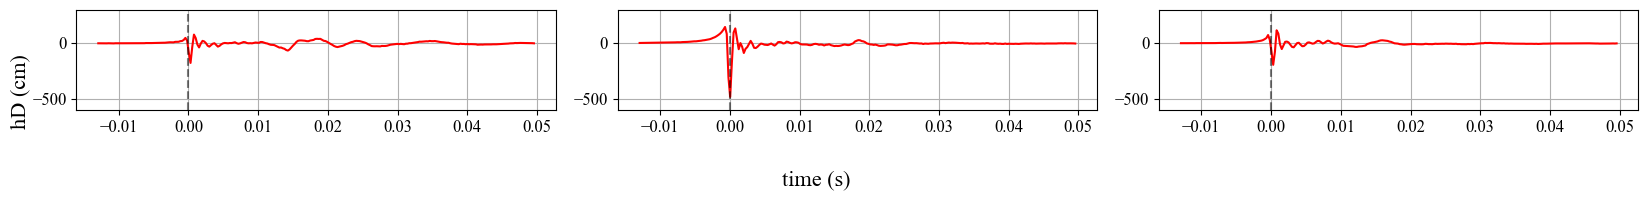

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


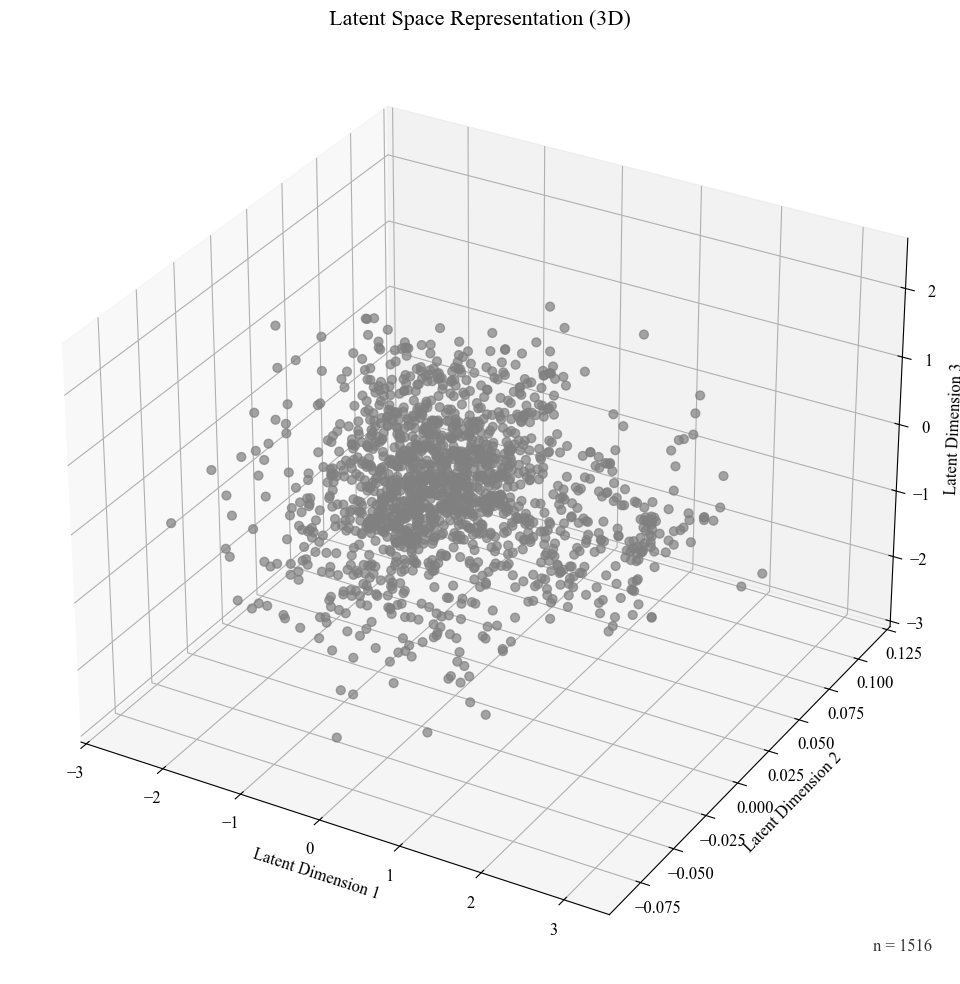

Epochs:  75%|███████▌  | 192/256 [07:49<02:50,  2.66s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 193/256 | Train Loss: 24.7222 | Val Loss: 31.5866


Epochs:  76%|███████▌  | 194/256 [07:53<02:28,  2.39s/it]

Epoch 194/256 | Train Loss: 24.6346 | Val Loss: 31.3420


Epochs:  76%|███████▌  | 195/256 [07:56<02:21,  2.32s/it]

Epoch 195/256 | Train Loss: 24.7268 | Val Loss: 30.9101


Epochs:  77%|███████▋  | 196/256 [07:58<02:14,  2.24s/it]

Epoch 196/256 | Train Loss: 24.5954 | Val Loss: 30.8794


Epochs:  77%|███████▋  | 197/256 [08:00<02:15,  2.29s/it]

Epoch 197/256 | Train Loss: 24.5106 | Val Loss: 31.4037


Epochs:  77%|███████▋  | 198/256 [08:02<02:15,  2.34s/it]

Epoch 198/256 | Train Loss: 24.5321 | Val Loss: 30.9039


Epochs:  78%|███████▊  | 199/256 [08:05<02:12,  2.32s/it]

Epoch 199/256 | Train Loss: 24.7009 | Val Loss: 31.2522


Epochs:  78%|███████▊  | 200/256 [08:07<02:10,  2.33s/it]

Epoch 200/256 | Train Loss: 24.6665 | Val Loss: 31.4559


Epochs:  79%|███████▊  | 201/256 [08:09<02:08,  2.33s/it]

Epoch 201/256 | Train Loss: 24.6992 | Val Loss: 31.5101


Epochs:  79%|███████▉  | 202/256 [08:12<02:02,  2.27s/it]

Epoch 202/256 | Train Loss: 24.6450 | Val Loss: 31.2926


Epochs:  79%|███████▉  | 203/256 [08:14<01:58,  2.24s/it]

Epoch 203/256 | Train Loss: 24.5281 | Val Loss: 30.9046


Epochs:  80%|███████▉  | 204/256 [08:16<01:52,  2.17s/it]

Epoch 204/256 | Train Loss: 24.5178 | Val Loss: 31.2254


Epochs:  80%|████████  | 205/256 [08:18<01:51,  2.18s/it]

Epoch 205/256 | Train Loss: 24.7355 | Val Loss: 31.6235


Epochs:  80%|████████  | 206/256 [08:20<01:46,  2.13s/it]

Epoch 206/256 | Train Loss: 24.5686 | Val Loss: 31.5749


Epochs:  81%|████████  | 207/256 [08:22<01:43,  2.12s/it]

Epoch 207/256 | Train Loss: 24.5426 | Val Loss: 31.3618
Epoch 208/256 | Train Loss: 24.8043 | Val Loss: 31.4483
Generated signals shape: (32, 256)
Epoch 208/256 | Train Loss: 24.8043 | Val Loss: 31.4483
Generated signals shape: (32, 256)


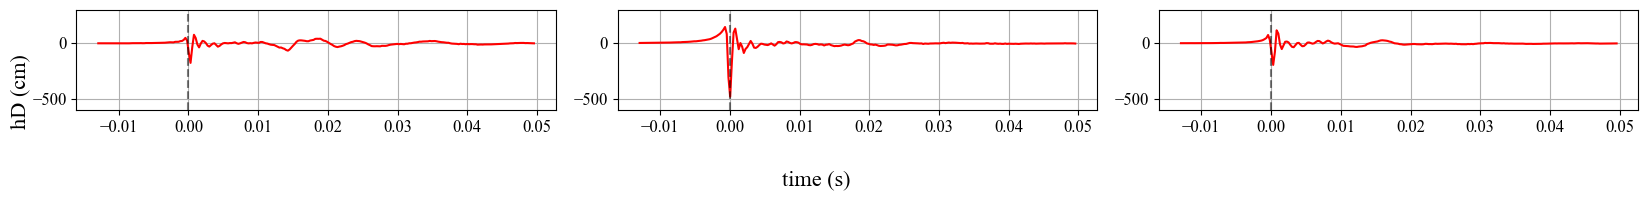

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


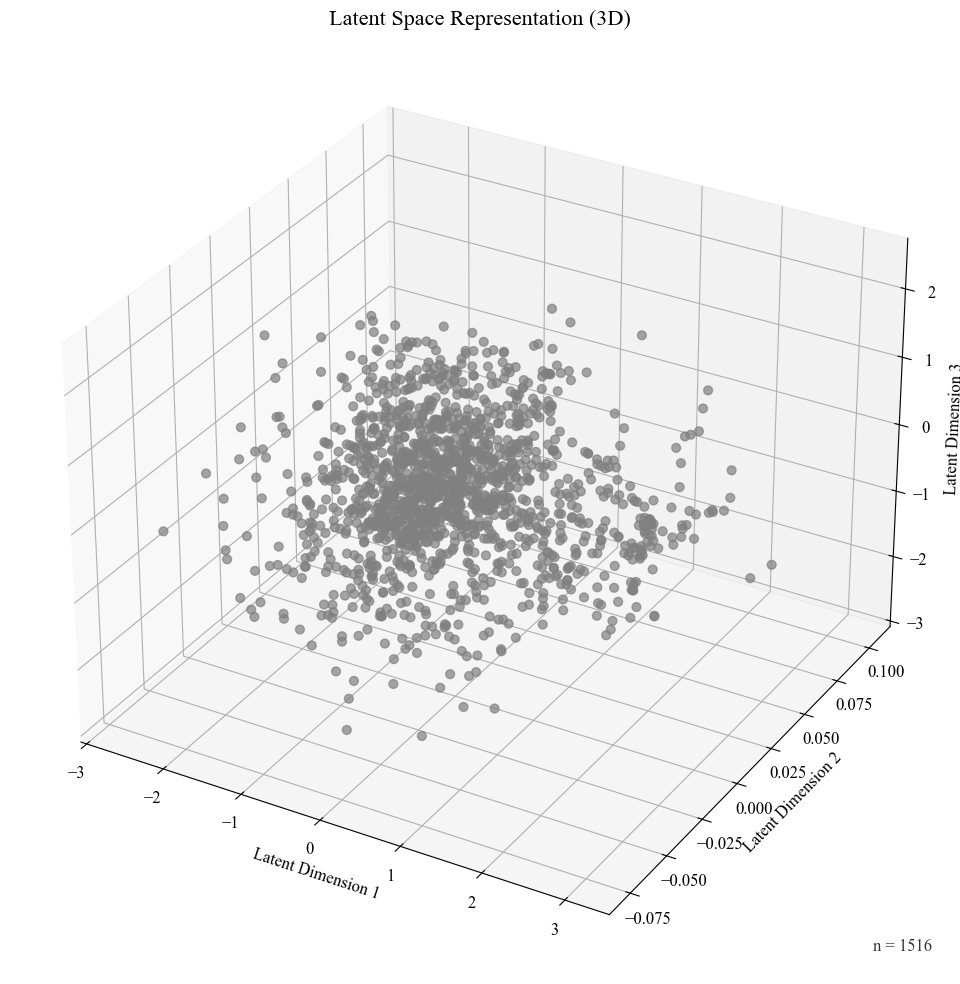

Epochs:  81%|████████▏ | 208/256 [08:26<02:12,  2.77s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 209/256 | Train Loss: 24.5562 | Val Loss: 31.2117


Epochs:  82%|████████▏ | 210/256 [08:30<01:50,  2.41s/it]

Epoch 210/256 | Train Loss: 24.6643 | Val Loss: 31.5828


Epochs:  82%|████████▏ | 211/256 [08:33<01:45,  2.33s/it]

Epoch 211/256 | Train Loss: 24.6814 | Val Loss: 31.0872


Epochs:  83%|████████▎ | 212/256 [08:35<01:38,  2.24s/it]

Epoch 212/256 | Train Loss: 24.5924 | Val Loss: 31.2794


Epochs:  83%|████████▎ | 213/256 [08:37<01:34,  2.20s/it]

Epoch 213/256 | Train Loss: 24.7781 | Val Loss: 31.2734


Epochs:  84%|████████▎ | 214/256 [08:39<01:29,  2.14s/it]

Epoch 214/256 | Train Loss: 24.6518 | Val Loss: 31.4728


Epochs:  84%|████████▍ | 215/256 [08:41<01:27,  2.14s/it]

Epoch 215/256 | Train Loss: 24.7010 | Val Loss: 31.7494


Epochs:  84%|████████▍ | 216/256 [08:43<01:24,  2.10s/it]

Epoch 216/256 | Train Loss: 24.8413 | Val Loss: 32.0212


Epochs:  85%|████████▍ | 217/256 [08:45<01:22,  2.11s/it]

Epoch 217/256 | Train Loss: 24.6324 | Val Loss: 31.4555


Epochs:  85%|████████▌ | 218/256 [08:47<01:19,  2.08s/it]

Epoch 218/256 | Train Loss: 24.4575 | Val Loss: 31.1692


Epochs:  86%|████████▌ | 219/256 [08:49<01:17,  2.10s/it]

Epoch 219/256 | Train Loss: 24.7670 | Val Loss: 31.6696


Epochs:  86%|████████▌ | 220/256 [08:51<01:14,  2.07s/it]

Epoch 220/256 | Train Loss: 24.6587 | Val Loss: 30.7774


Epochs:  86%|████████▋ | 221/256 [08:53<01:11,  2.04s/it]

Epoch 221/256 | Train Loss: 24.6752 | Val Loss: 30.8402


Epochs:  87%|████████▋ | 222/256 [08:55<01:10,  2.07s/it]

Epoch 222/256 | Train Loss: 24.7077 | Val Loss: 31.2413


Epochs:  87%|████████▋ | 223/256 [08:57<01:07,  2.05s/it]

Epoch 223/256 | Train Loss: 24.6888 | Val Loss: 31.7664
Epoch 224/256 | Train Loss: 24.7009 | Val Loss: 31.4135
Generated signals shape: (32, 256)
Epoch 224/256 | Train Loss: 24.7009 | Val Loss: 31.4135
Generated signals shape: (32, 256)


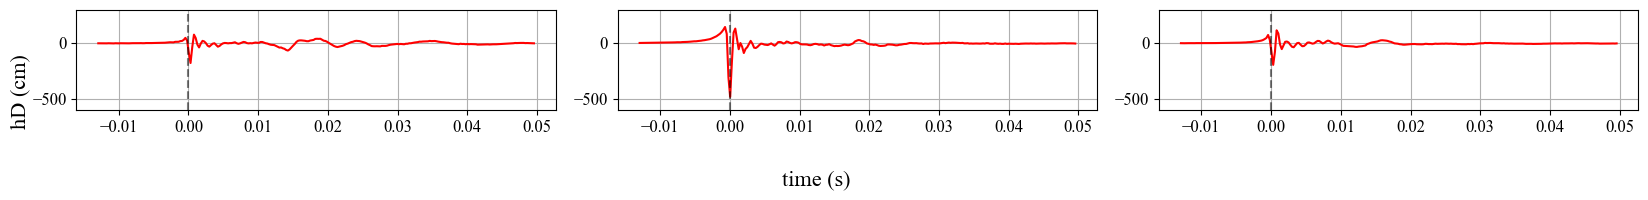

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


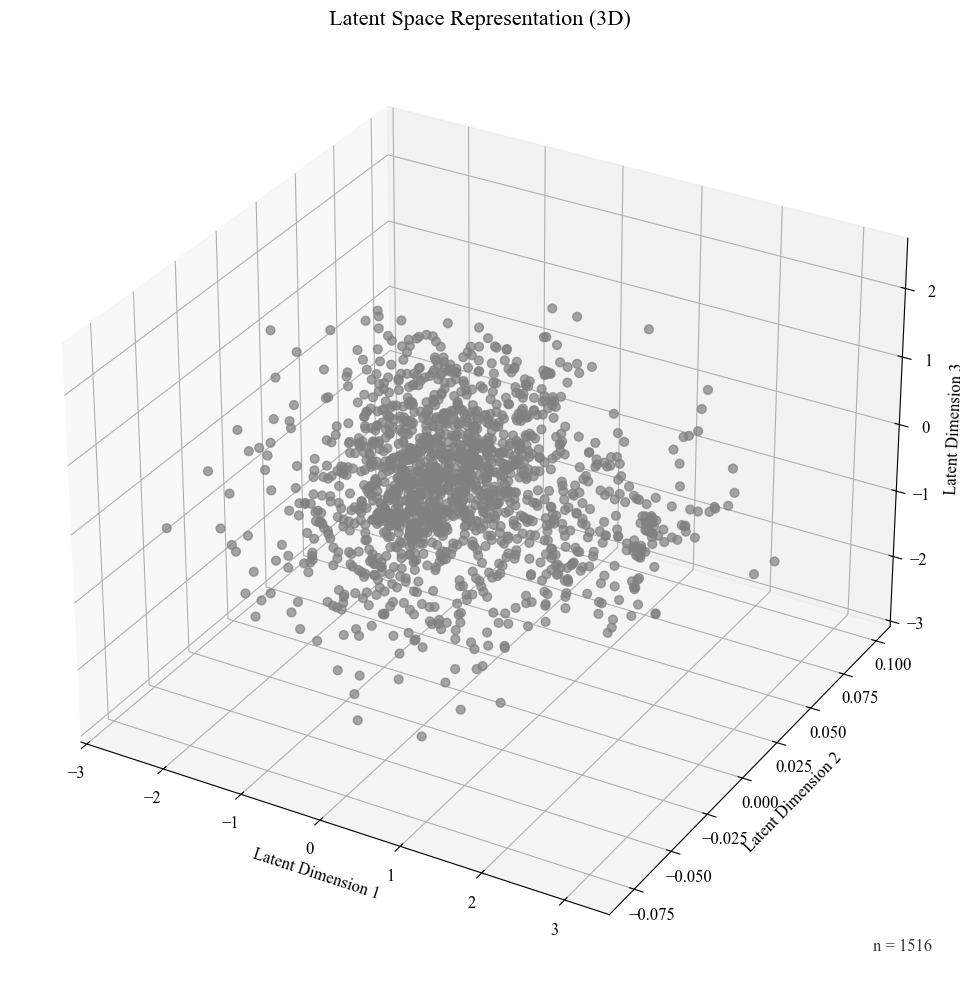

Epochs:  88%|████████▊ | 224/256 [09:01<01:25,  2.67s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 225/256 | Train Loss: 24.5934 | Val Loss: 31.2565


Epochs:  88%|████████▊ | 226/256 [09:05<01:09,  2.33s/it]

Epoch 226/256 | Train Loss: 24.6595 | Val Loss: 31.4584


Epochs:  89%|████████▊ | 227/256 [09:07<01:04,  2.22s/it]

Epoch 227/256 | Train Loss: 24.4926 | Val Loss: 31.1282


Epochs:  89%|████████▉ | 228/256 [09:10<01:01,  2.19s/it]

Epoch 228/256 | Train Loss: 24.7427 | Val Loss: 31.6102


Epochs:  89%|████████▉ | 229/256 [09:12<00:57,  2.13s/it]

Epoch 229/256 | Train Loss: 24.8064 | Val Loss: 31.6817


Epochs:  90%|████████▉ | 230/256 [09:14<00:54,  2.09s/it]

Epoch 230/256 | Train Loss: 24.6961 | Val Loss: 31.8161


Epochs:  90%|█████████ | 231/256 [09:16<00:51,  2.06s/it]

Epoch 231/256 | Train Loss: 24.7709 | Val Loss: 31.5938


Epochs:  91%|█████████ | 232/256 [09:18<00:53,  2.25s/it]

Epoch 232/256 | Train Loss: 24.7597 | Val Loss: 31.1807


Epochs:  91%|█████████ | 233/256 [09:20<00:49,  2.17s/it]

Epoch 233/256 | Train Loss: 24.8742 | Val Loss: 31.9699


Epochs:  91%|█████████▏| 234/256 [09:22<00:48,  2.20s/it]

Epoch 234/256 | Train Loss: 24.7631 | Val Loss: 31.4696


Epochs:  92%|█████████▏| 235/256 [09:25<00:45,  2.16s/it]

Epoch 235/256 | Train Loss: 24.8173 | Val Loss: 31.6353


Epochs:  92%|█████████▏| 236/256 [09:27<00:42,  2.11s/it]

Epoch 236/256 | Train Loss: 24.8024 | Val Loss: 31.1249


Epochs:  93%|█████████▎| 237/256 [09:29<00:39,  2.08s/it]

Epoch 237/256 | Train Loss: 24.8151 | Val Loss: 30.9995


Epochs:  93%|█████████▎| 238/256 [09:31<00:40,  2.22s/it]

Epoch 238/256 | Train Loss: 24.7942 | Val Loss: 31.9136


Epochs:  93%|█████████▎| 239/256 [09:33<00:36,  2.16s/it]

Epoch 239/256 | Train Loss: 24.9456 | Val Loss: 31.6186
Epoch 240/256 | Train Loss: 24.8101 | Val Loss: 31.3632
Generated signals shape: (32, 256)
Epoch 240/256 | Train Loss: 24.8101 | Val Loss: 31.3632
Generated signals shape: (32, 256)


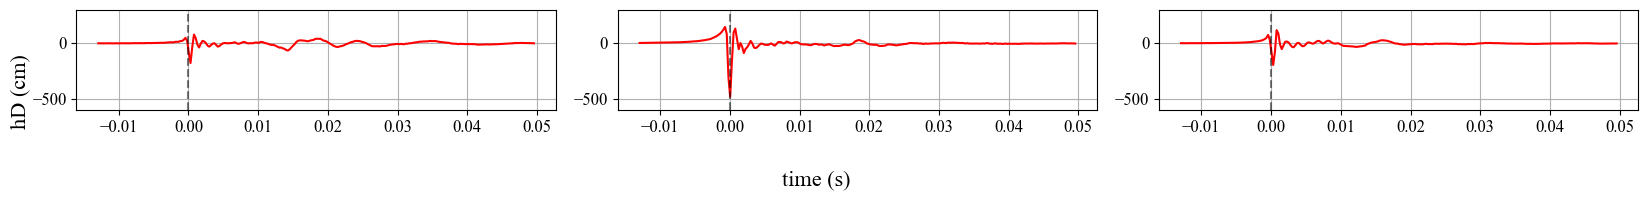

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


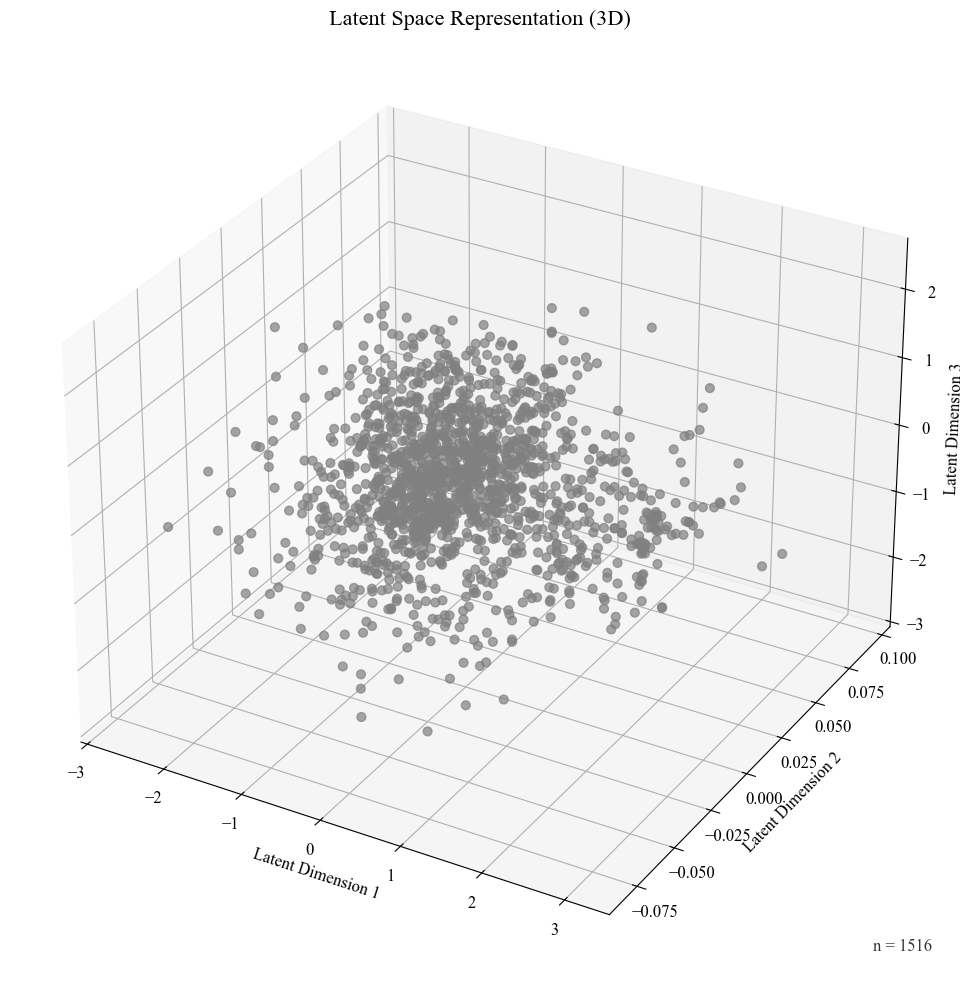

Epochs:  94%|█████████▍| 240/256 [09:37<00:42,  2.64s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 241/256 | Train Loss: 24.8486 | Val Loss: 31.6761


Epochs:  95%|█████████▍| 242/256 [09:41<00:32,  2.33s/it]

Epoch 242/256 | Train Loss: 24.8357 | Val Loss: 31.2306


Epochs:  95%|█████████▍| 243/256 [09:43<00:28,  2.23s/it]

Epoch 243/256 | Train Loss: 24.7082 | Val Loss: 31.3861


Epochs:  95%|█████████▌| 244/256 [09:45<00:26,  2.20s/it]

Epoch 244/256 | Train Loss: 24.5842 | Val Loss: 31.6184


Epochs:  96%|█████████▌| 245/256 [09:47<00:24,  2.23s/it]

Epoch 245/256 | Train Loss: 24.7619 | Val Loss: 31.2677


Epochs:  96%|█████████▌| 246/256 [09:52<00:29,  2.99s/it]

Epoch 246/256 | Train Loss: 24.8002 | Val Loss: 31.7296


Epochs:  96%|█████████▋| 247/256 [09:54<00:24,  2.69s/it]

Epoch 247/256 | Train Loss: 24.9360 | Val Loss: 31.5730


Epochs:  97%|█████████▋| 248/256 [09:56<00:20,  2.52s/it]

Epoch 248/256 | Train Loss: 24.8580 | Val Loss: 31.7971


Epochs:  97%|█████████▋| 249/256 [09:58<00:16,  2.41s/it]

Epoch 249/256 | Train Loss: 24.8741 | Val Loss: 32.0122


Epochs:  98%|█████████▊| 250/256 [10:00<00:13,  2.32s/it]

Epoch 250/256 | Train Loss: 24.6717 | Val Loss: 31.1638


Epochs:  98%|█████████▊| 251/256 [10:05<00:15,  3.04s/it]

Epoch 251/256 | Train Loss: 24.7995 | Val Loss: 31.7116


Epochs:  98%|█████████▊| 252/256 [10:09<00:12,  3.22s/it]

Epoch 252/256 | Train Loss: 24.9211 | Val Loss: 32.1038


Epochs:  99%|█████████▉| 253/256 [10:11<00:08,  2.99s/it]

Epoch 253/256 | Train Loss: 24.7875 | Val Loss: 31.4449


Epochs:  99%|█████████▉| 254/256 [10:14<00:05,  2.99s/it]

Epoch 254/256 | Train Loss: 24.7530 | Val Loss: 31.1181


Epochs: 100%|█████████▉| 255/256 [10:17<00:02,  2.95s/it]

Epoch 255/256 | Train Loss: 24.7454 | Val Loss: 31.8984
Epoch 256/256 | Train Loss: 24.8244 | Val Loss: 32.1016
Generated signals shape: (32, 256)
Epoch 256/256 | Train Loss: 24.8244 | Val Loss: 32.1016
Generated signals shape: (32, 256)


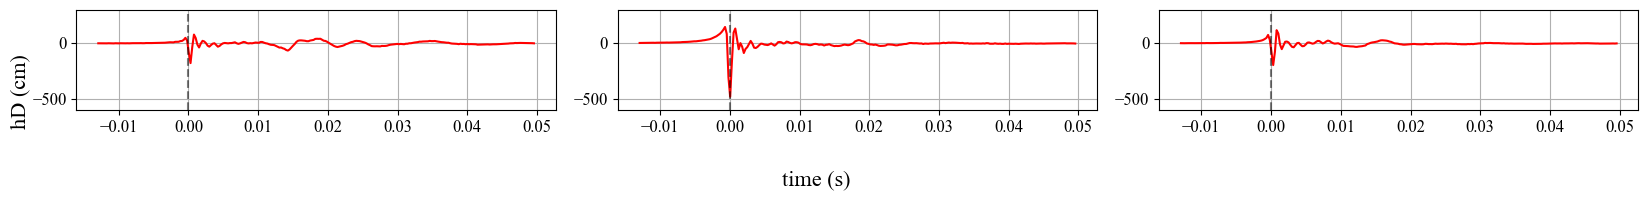

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


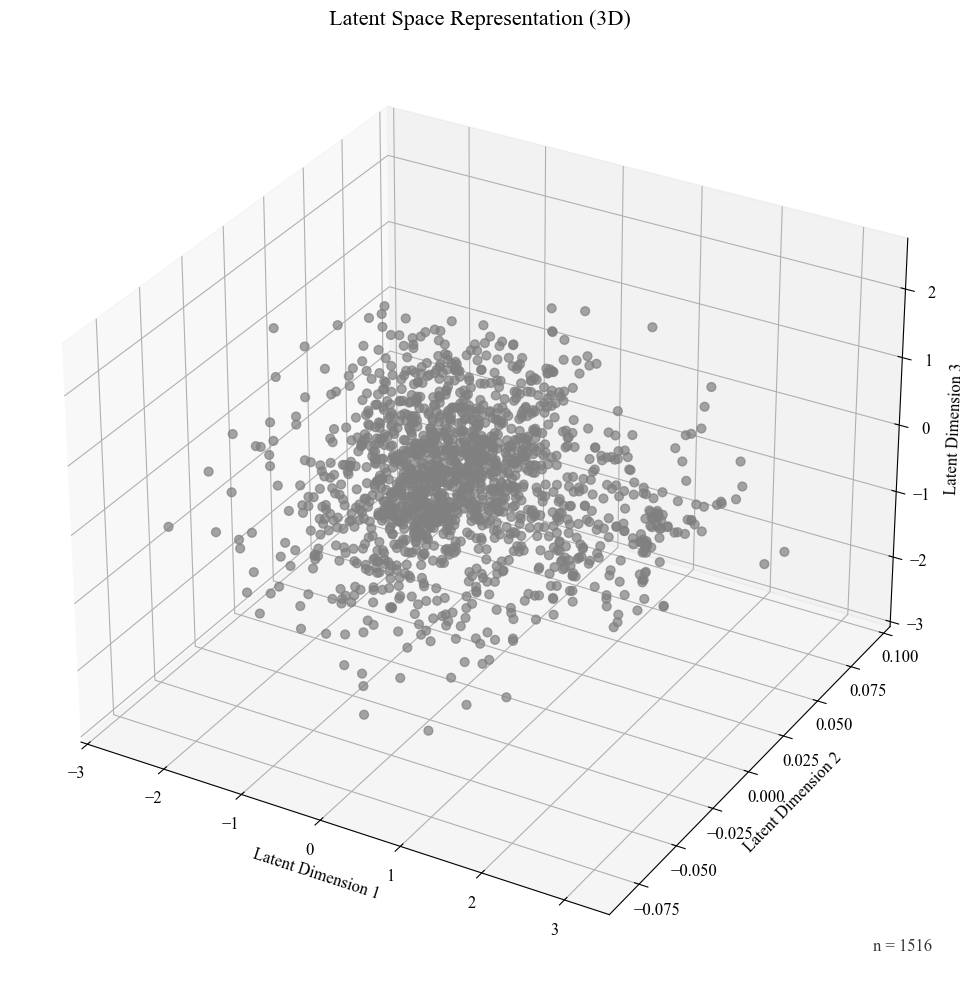

Epochs: 100%|██████████| 256/256 [10:21<00:00,  2.43s/it]

Training Time: 10.36min
Saved VAE model to outdir/generator_weights.pt


In [8]:
vae_trainer = Trainer(toy=toy, noise=True, curriculum=True)
vae_trainer.train()

### Display Results

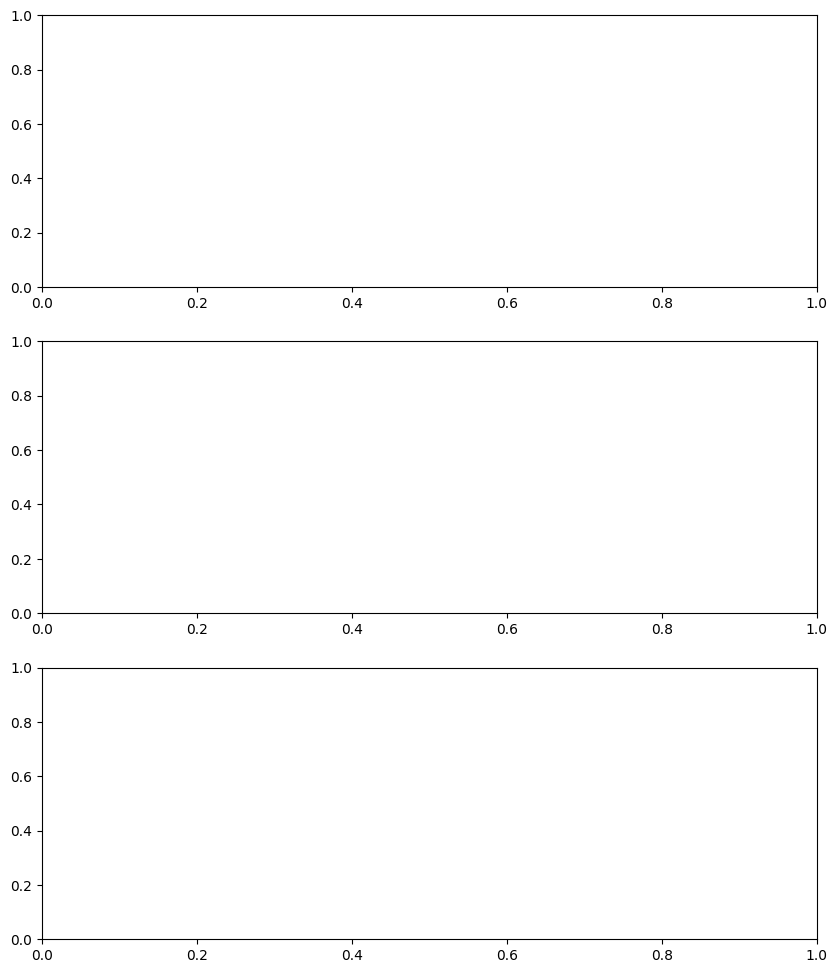

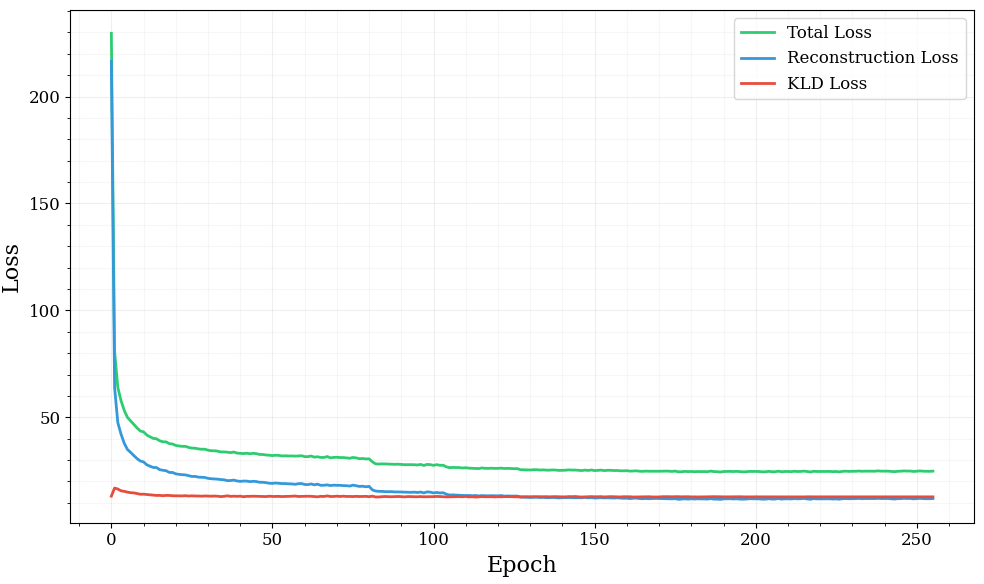

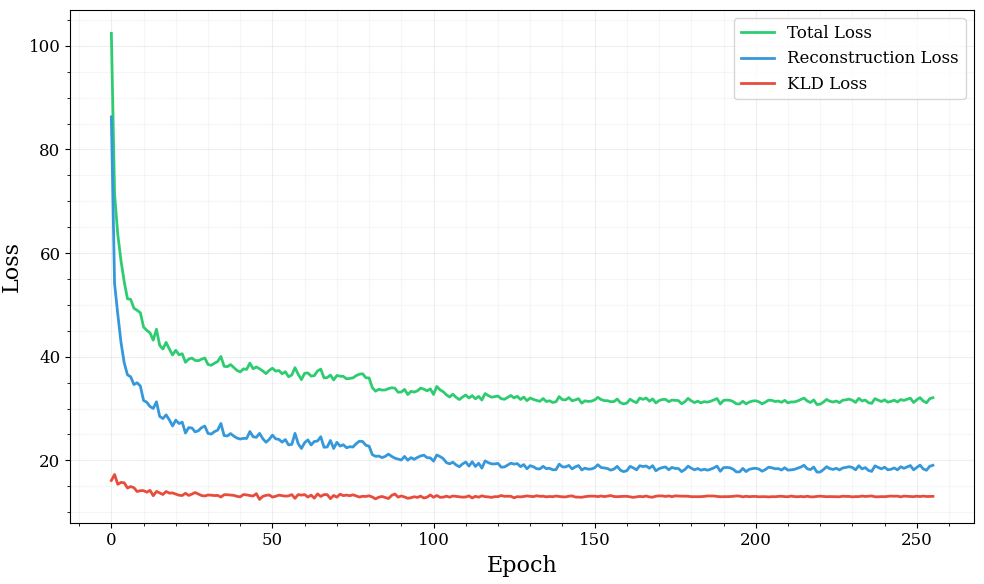

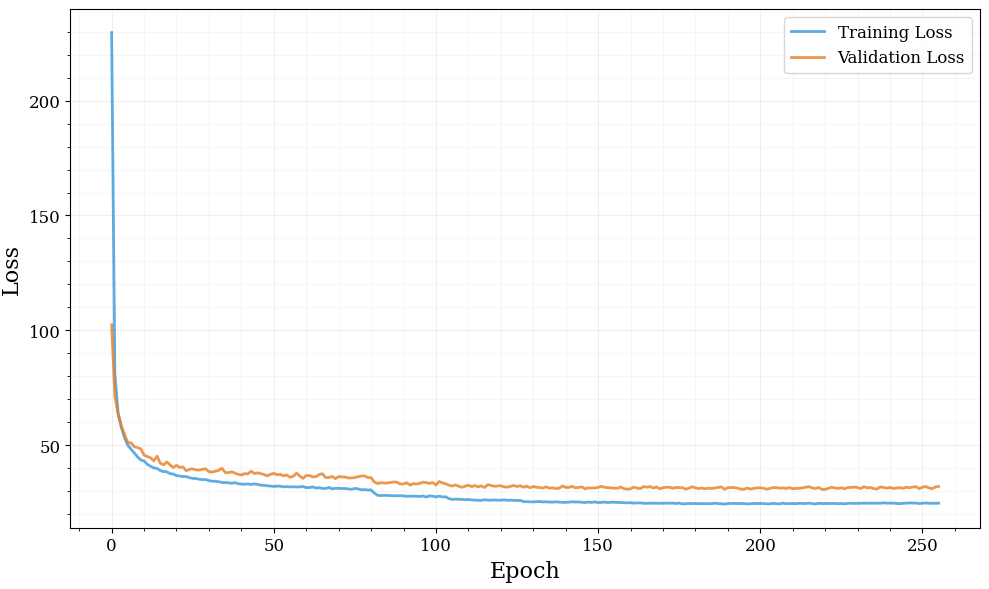

In [9]:
vae_trainer.display_results()

In [10]:
# plot_latent_morph_up_and_down(
#     vae_trainer.vae,
#     signal_1=ccsn_dataset.__getitem__(800)[0],
#     signal_2=ccsn_dataset.__getitem__(600)[0],
#     max_value=vae_trainer.training_dataset.max_strain,
#     train_dataset=CCSNData(),
#     steps=1
# )

Execution Time: 0.11017608642578125 seconds


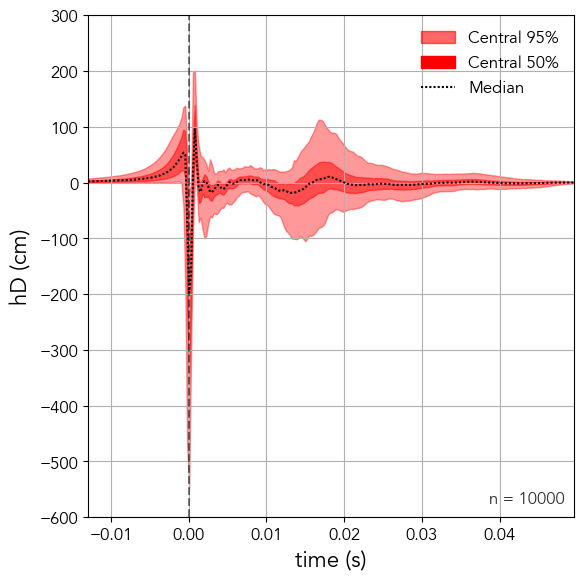

In [11]:
vae_trainer.plot_generated_signal_distribution(
    background="white",
    font_family="sans-serif",
    font_name="Avenir"
)

In [12]:
vae_trainer.plot_reconstruction_distribution(
    num_samples=1000,
    index=1
)

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


TypeError: plot_reconstruction_distribution() got an unexpected keyword argument 'model'

In [ ]:
vae_trainer.save_models()

In [ ]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from starccato_flow.data.ccsn_data import CCSNData
from starccato_flow.utils.defaults import DEVICE

from nflows.distributions.normal import StandardNormal
from nflows.transforms import CompositeTransform, ReversePermutation, MaskedAffineAutoregressiveTransform
from nflows.flows import Flow
import torch.optim as optim


def train_npe_with_vae(vae_trainer, num_epochs=20, batch_size=32, lr=1e-4, flow=None):
    """
    Train a MaskedAutoregressiveFlow to estimate p(params | latent)
    """

    vae = vae_trainer.vae
    vae.eval()  # freeze VAE
    param_dim = 1  # your target parameter space

    latent_dim = 16
    num_layers = 10
    # create base dist and transforms in float32
    base_dist = StandardNormal(shape=[param_dim])

    # composite transform
    transforms = []
    for i in range(num_layers):
        if i % 2 == 0:
            transforms.append(ReversePermutation(features=param_dim))
        transforms.append(
            MaskedAffineAutoregressiveTransform(
                features=param_dim,
                hidden_features=128,
                context_features=latent_dim,
            )
        )

    transform = CompositeTransform(transforms)

    # create flow on CPU first, in float32
    flow = Flow(transform, base_dist)

    # move to device explicitly, MPS requires float32
    flow = flow.to(DEVICE, dtype=torch.float32)

    optimizer = optim.Adam(flow.parameters(), lr=lr)

    ccsn_loader = DataLoader(
        CCSNData(noise=True, curriculum=False),
        batch_size=batch_size,
        shuffle=True,
        drop_last=True,
    )

    for epoch in range(num_epochs):
        total_loss = 0.0

        for batch_idx, (signal, noisy_signal, params) in enumerate(ccsn_loader):
            signal = signal.to(DEVICE).float()
            noisy_signal = noisy_signal.to(DEVICE).float()
            params = params.to(DEVICE).float()
            # take only the first param
            params = params[:, :, 0]

            # Encode signal into latent space
            with torch.no_grad():
                _, mean, log_var = vae(noisy_signal)
                mean = mean.view(mean.size(0), -1)
                z_latent = vae.reparameterization(mean, log_var)

            # p(params | z)
            params = params.view(params.size(0), -1) 
            z_latent = z_latent.view(z_latent.size(0), -1) 

            optimizer.zero_grad(set_to_none=True)

            log_prob = flow.log_prob(params, context=mean) # this conditions the flow on the latent variable z
            loss = -log_prob.mean()

            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}] | Flow NLL: {total_loss / len(ccsn_loader):.4f}")

    return flow

npe_flow = train_npe_with_vae(vae_trainer, num_epochs=50, batch_size=32, lr=1e-4)

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


tensor([[0.0990],
        [0.0128],
        [0.0479],
        [0.0359],
        [0.1753],
        [0.0833],
        [0.1620],
        [0.0588],
        [0.0060],
        [0.0595],
        [0.1581],
        [0.0921],
        [0.2155],
        [0.0239],
        [0.0088],
        [0.1029],
        [0.0851],
        [0.1284],
        [0.0785],
        [0.0966],
        [0.1290],
        [0.0915],
        [0.0025],
        [0.0273],
        [0.1329],
        [0.0699],
        [0.0368],
        [0.0015],
        [0.1880],
        [0.1815],
        [0.1362],
        [0.1177]], device='mps:0')
tensor([[0.1210],
        [0.0058],
        [0.1418],
        [0.1175],
        [0.0008],
        [0.0120],
        [0.1324],
        [0.0687],
        [0.0734],
        [0.0285],
        [0.0558],
        [0.0371],
        [0.2028],
        [0.1512],
        [0.1336],
        [0.0585],
        [0.0500],
        [0.0264],
        [0.0788],
        [0.0125],
        [0.0159],
        [0.1173],
        [0.

In [ ]:
import torch
import matplotlib.pyplot as plt

vae_trainer.vae.eval()
npe_flow.eval()

from torch.utils.data import DataLoader
from starccato_flow.data.ccsn_data import CCSNData
from starccato_flow.utils.defaults import DEVICE

index = 1100

signal = vae_trainer.training_dataset.__getitem__(index)[0]
noisy_signal = vae_trainer.training_dataset.__getitem__(index)[1]
params = vae_trainer.training_dataset.__getitem__(index)[2]

# Ensure batch dimension [B, C, T]
if noisy_signal.dim() == 2:
    noisy_signal = noisy_signal.unsqueeze(0)

with torch.no_grad():
    noisy_signal = noisy_signal.to(DEVICE).float()
    signal = signal.to(DEVICE).float()
    _, mean, log_var = vae_trainer.vae(noisy_signal)
    z = vae_trainer.vae.reparameterization(mean, torch.exp(0.5 * log_var))

    # Use z as context
    context = z.view(z.size(0), -1).to(DEVICE, dtype=torch.float32)

    # Sample from flow conditioned on z
    num_draws = 1000
    if context.size(0) != num_draws:
        context = context.repeat(num_draws, 1)

    samples = npe_flow.sample(num_samples=num_draws, context=context)
    samples = samples.reshape(num_draws, -1)  # -> [num_draws, 6]

    samples_cpu = samples.detach().cpu()
    true_params = params.detach().cpu() if torch.is_tensor(params) else params
    true_params = true_params.flatten()  # Flatten to [6] from [1, 6]
    
    print("True params:", true_params)
    print("Mean predicted:", samples_cpu.mean(dim=0))
    print("Std predicted:", samples_cpu.std(dim=0))
    
    # Plot histogram of first parameter
    plt.figure(figsize=(10, 6))
    plt.hist(samples_cpu[:, 0].numpy(), bins=50, alpha=0.7, edgecolor='black')
    plt.axvline(true_params[0].item(), color='red', linestyle='--', linewidth=2, label=f'True value: {true_params[0].item():.3f}')
    plt.axvline(samples_cpu[:, 0].mean().item(), color='green', linestyle='--', linewidth=2, label=f'Predicted mean: {samples_cpu[:, 0].mean().item():.3f}')
    plt.xlabel('Parameter 1 Value')
    plt.ylabel('Frequency')
    plt.title('Posterior Distribution of Parameter 1')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()